In [1]:
#Libraries used in the notebook
import csv
import json
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import json
import sys
import glob
import os
import geopandas as gpd
import random 
import folium
from shapely.geometry import LineString, Polygon, mapping
from folium.plugins import MarkerCluster
import nltk
nltk.download('punkt')
import math
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import StanfordPOSTagger
from nltk import FreqDist
from tabulate import tabulate
import re
import requests
from senpy.client import Client

[nltk_data] Downloading package punkt to /Users/Luis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Step 1: Transform the json files to csv

In [2]:
#Script that transforms the json files to csv in order to analyze them.
files = glob.glob('./*.json')
files.sort()
files
for i in range(len(files)):
    datain = open(files[i], "r")
    dataout = open(files[i] + '.tmp', "w")
    n=0
    for j in datain:
        dataout.write(j)
    datain.close()
    dataout.close()
    datosf = files[i] + '.tmp'
    with open(datosf, encoding='utf-8') as f_input:
        df = pd.read_json(f_input)
        if files[i].endswith('.json'):
            files[i] = files[i][:-5]        
    df.to_csv(files[i] + ".csv", encoding='utf-8', index=False)

In [4]:
#ONLY after the first process has finished execute this process to eliminate all the json files.
files = glob.glob('./*.json')
files.sort()
files
for i in files:
    os.remove(i)
files = glob.glob('./*.json.tmp')
files.sort()
files
for i in files:
    os.remove(i)

# Step 2: First Filter applied

In [5]:
#Filtering the tweets by language and selecting the fields that are interesting for our research.
files = glob.glob('./*.csv')
files.sort()
files

for i in files:
    df= pd.read_csv(i)
    df
    df.shape
    df[['coordinates','created_at','geo','id','id_str','lang','place','text','user']][(df.lang == 'es') & (df.place.notna())].to_csv(i + ".tmp", encoding='utf-8', index=False)


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,8,18,29,34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,8,18,29,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,20,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=resu

KeyError: "['coordinates' 'created_at' 'geo' 'id' 'id_str' 'lang' 'place' 'text'\n 'user'] not in index"

In [6]:
#Counting the tweets that have the 'place' field filled in. 
todos = 0
conGeo = 0
files = glob.glob('./*.csv.tmp')
files.sort()
files
for i in files:
    df= pd.read_csv(i)
    todos = todos + df['place'].size
    conGeo = conGeo + df['place'][df.place.notna()].size
    print(str(todos))
    print(str(conGeo))

97
97
239
239
441
441
691
691
1002
1002
1358
1358
1735
1735
2124
2124
2521
2521
2892
2892
3319
3319
3700
3700
4076
4076
4470
4470
4904
4904
5219
5219


There is a risk in the conversion that the new CSV file is either malformed or produces a buffer overflow during its reading. This final code allows the user to try to read each csv individually and check which one is producing an error, so it can then be eliminated.

In [ ]:
#if the first step doesn't work because a buffer overflow exception try reading each one of the csv separately
files = glob.glob('./*.csv')
files.sort()
files
#To read every file separately change the 0 by a 1, 2, 3 ... until you've tried to open every file
#Once detected the corrupted file, erase it and try again step one.
df= pd.read_csv(files[0])
df

# Step 3: Collect the tweets of the day

Once the files have been converted to csv and filtered, we collect the remaining tweets in a unique file.

In [9]:
#Get the csv.tmp files and merge them into a single file with the tweets of the day.
#Shape Dataset of the day with the place field filled in.
files = glob.glob('./*.csv.tmp')
files.sort()
files
df = pd.read_csv(files[0])

for i in range(len(files)):
    if i > 0:
        dfi = pd.read_csv(files[i])
        df = pd.concat([df,dfi])       
df.to_csv("2019_04_08.csv", encoding='utf-8', index=False)

# Step 4: Extract country, city, and coordinates of the tweets

In this step, the main goal is to locate the tweets using the information provided in the place field. We will try to extract from this field the country in which the tweets where written in order to select only the tweets written in Spain. Then we will extract the city for a more extensive analysis, as well as the latitude and longitude.

In [258]:
df= pd.read_csv('2019_04_23.csv')
longitude = []
latitude = []
country = []
city = []
n=0
for i in df['place'].values:
    a = i.replace("'", '"')
    
    print(n)
    try:
        b = json.loads(a)
        n = n + 1
    except ValueError:
        longitude.append(0)
        latitude.append(0)
        country.append(0)
        city.append(0)
        continue
        
    longitude.append(b['bounding_box']['coordinates'][0][0][0])
    latitude.append(b['bounding_box']['coordinates'][0][0][1])
    country.append(b['country'])
    city.append(b['name'])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269


Once we have a list with the countries, cities and coordinates we check the size of the lists, to correct any error produced. If this size matches then we include this lists in our dataset.

In [125]:
json.loads(df['place'].values[0].replace("'", '"'))

{'id': '0105a80417c159b4',
 'url': 'https://api.twitter.com/1.1/geo/id/0105a80417c159b4.json',
 'place_type': 'city',
 'name': 'Barranquilla',
 'full_name': 'Barranquilla, Colombia',
 'country_code': 'CO',
 'country': 'Colombia',
 'bounding_box': {'type': 'Polygon',
  'coordinates': [[[-74.925765, 10.869528],
    [-74.925765, 11.046618],
    [-74.774101, 11.046618],
    [-74.774101, 10.869528]]]},
 'attributes': {}}

In [159]:
print(len(longitude))
print(len(latitude))
print(len(country))
print(len(city))
df

8707
8707
8707
8707


,coordinates,created_at,geo,id,id_str,lang,place,text,user
0,NaN,2019-04-20 00:00:02.000,NaN,1.119390e+18,1.119390e+18,es,"{'id': '30e5bcffda059c80', 'url': 'https://api...",@rxnata_ Y a las empanadas no se les ponen pas...,"{'id': 2553374999, 'id_str': '2553374999', 'na..."
1,NaN,2019-04-20 00:00:03.000,NaN,1.119390e+18,1.119390e+18,es,"{'id': '00577114384dea2b', 'url': 'https://api...",recién mi abuela (hiper católica) me dice “hoy...,"{'id': 1138097749, 'id_str': '1138097749', 'na..."
2,NaN,2019-04-20 00:00:07.000,NaN,1.119390e+18,1.119390e+18,es,"{'id': '00577114384dea2b', 'url': 'https://api...",@AleXCambiemos Mejor con aceite de oliva 😉😆,"{'id': 473194490, 'id_str': '473194490', 'name..."
3,NaN,2019-04-20 00:00:09.000,NaN,1.119390e+18,1.119390e+18,es,"{'id': '006099b7317c8404', 'url': 'https://api...",Pedimos unos Siu Mai de cerdo y camarones para...,"{'id': 391766934, 'id_str': '391766934', 'name..."
4,NaN,2019-04-20 00:00:14.000,NaN,1.119390e+18,1.119390e+18,es,"{'id': '01b6248340098bad', 'url': 'https://api...",@FerAlvarez @PabloViruega Saludos desde San S...,"{'id': 634250604, 'id_str': '634250604', 'name..."
5,NaN,2019-04-20 00:00:14.000,NaN,1.119390e+18,1.119390e+18,es,"{'id': '0140861b6a0b0d45', 'url': 'https://api...",@camilamaria_05 El lomo sudao,"{'id': 1042156632099246080, 'id_str': '1042156..."
6,NaN,2019-04-20 00:00:34.000,NaN,1.119390e+18,1.119390e+18,es,"{'id': '001d85c66570434e', 'url': 'https://api...",Se me antojo una hamburguesa 🤤🍔🍟,"{'id': 87453011, 'id_str': '87453011', 'name':..."
7,NaN,2019-04-20 00:00:35.000,NaN,1.119390e+18,1.119390e+18,es,"{'id': 'ef05e80eeff9b3c1', 'url': 'https://api...","Me apliqué el ""no, en la casa hay comida"" al p...","{'id': 3323524393, 'id_str': '3323524393', 'na..."
8,NaN,2019-04-20 00:00:35.000,NaN,1.119390e+18,1.119390e+18,es,"{'id': '00ec4c32070f5076', 'url': 'https://api...",Con Coca-Cola,"{'id': 181826009, 'id_str': '181826009', 'name..."
9,NaN,2019-04-20 00:00:40.000,NaN,1.119390e+18,1.119390e+18,es,"{'id': '13d479b108707983', 'url': 'https://api...",Cuando mis tíos invitan a tomar una cerveza y...,"{'id': 287429898, 'id_str': '287429898', 'name..."


In [259]:
df['Country'] = country
df['City'] = city
df['Coordinates'] = list(zip(longitude, latitude))
df.to_csv('geoAnalyzed123.csv')

In [92]:
df

,coordinates,created_at,geo,id,id_str,lang,place,text,user,Country,City,Coordinates
0,NaN,2019-04-18 19:36:39.000,NaN,1.118962e+18,1.118962e+18,es,"{'id': '0010b4cb51ca93d8', 'url': 'https://api...",@marceloandresds Al. Meme Pavo,"{'id': 89756839, 'id_str': '89756839', 'name':...",Chile,Santiago,"(-70.692959, -33.478574)"
1,NaN,2019-04-18 19:36:41.000,NaN,1.118962e+18,1.118962e+18,es,"{'id': '00568b6015ec5bd0', 'url': 'https://api...",@VoteCerebro Les importa un pepino al descereb...,"{'id': 1076989586964967425, 'id_str': '1076989...",Argentina,Villa San Lorenzo,"(-65.506553, -24.767379)"
2,NaN,2019-04-18 19:36:47.000,NaN,1.118962e+18,1.118962e+18,es,"{'id': '0150459b5095a59f', 'url': 'https://api...",@patriciosainzr La paciencia Pato para respond...,"{'id': 4519765815, 'id_str': '4519765815', 'na...",Chile,Concepción,"(-73.091398, -36.923936)"
3,NaN,2019-04-18 19:36:51.000,NaN,1.118962e+18,1.118962e+18,es,"{'id': '07d9e61320088000', 'url': 'https://api...",Comer en los mercaditos siempre será bien deli...,"{'id': 130959201, 'id_str': '130959201', 'name...",México,Mercado de Carrillo Puerto,"(-88.044492, 19.580563)"
4,NaN,2019-04-18 19:36:55.000,NaN,1.118962e+18,1.118962e+18,es,"{'id': '211f15d1b1a0f8d5', 'url': 'https://api...",@Joshi_wow @cathal_92 @IFZGZ Que bien! Gente a...,"{'id': 210968416, 'id_str': '210968416', 'name...",España,Vitoria-Gasteiz,"(-2.853491, 42.764559)"
5,"{'type': 'Point', 'coordinates': [9.16371179, ...",2019-04-18 19:37:15.000,"{'type': 'Point', 'coordinates': [45.48562682,...",1.118962e+18,1.118962e+18,es,"{'id': '1ea588c12abd39d7', 'url': 'https://api...",Una de mis #verduras #favoritas 🤗🍅🌶🍆🍊🍋😍\n\n#ba...,"{'id': 222503070, 'id_str': '222503070', 'name...",Italia,Milán,"(9.040628, 45.386726)"
6,NaN,2019-04-18 19:37:36.000,NaN,1.118962e+18,1.118962e+18,es,"{'id': '017f47ab29a7772a', 'url': 'https://api...",Noah Centineo está más bueno que comer pollo c...,"{'id': 1074377339751022597, 'id_str': '1074377...",Argentina,Formosa,"(-58.238548, -26.209999)"
7,NaN,2019-04-18 19:37:36.000,NaN,1.118962e+18,1.118962e+18,es,"{'id': 'b08303575ff1d1c7', 'url': 'https://api...","@pablofluiters Completamente de acuerdo, salvo...","{'id': 2574382174, 'id_str': '2574382174', 'na...",España,Alcalá de Guadaíra,"(-5.944403, 37.187197)"
8,NaN,2019-04-18 19:37:57.000,NaN,1.118962e+18,1.118962e+18,es,"{'id': '4afa2757051c5192', 'url': 'https://api...","""chicos cierra mostaza estos 2 días porque la ...","{'id': 255717796, 'id_str': '255717796', 'name...",Argentina,Buenos Aires,"(-63.39386, -41.035009)"
9,NaN,2019-04-18 19:38:00.000,NaN,1.118962e+18,1.118962e+18,es,"{'id': '01f98b77415d9c8d', 'url': 'https://api...",La avena le debe dar una rextura exquisita\nLa...,"{'id': 2948601040, 'id_str': '2948601040', 'na...",United States,Tamiami,"(-80.498029, 25.726759)"


Then we extract from the dataset the tweets that where written in Spain. After this, we will filter the location of the tweets with a more exhaustive approach, looking for the Autonomous Communities in which the tweets where written.

In [260]:
df = pd.read_csv('geoAnalyzed123.csv')
df = df[['created_at','id','id_str','lang','place','text','user','Country','City','Coordinates']][(df.Country == 'España') | (df.Country == 'Spain') | (df.Country == 'Espanya')]
df.to_csv("geoAnalyzed223.csv", encoding='utf-8', index=False)


In [261]:
df = pd.read_csv('geoAnalyzed223.csv')
df

,created_at,id,id_str,lang,place,text,user,Country,City,Coordinates
0,2019-04-23 00:05:07.000,1.120479e+18,1.120479e+18,es,"{'id': '6fe43fdcf6735ba2', 'url': 'https://api...","Y cuándo me mires a los ojos, entenderás que n...","{'id': 836628257646706689, 'id_str': '83662825...",España,Santiponce,"(-6.062605, 37.413031)"
1,2019-04-23 00:05:50.000,1.120479e+18,1.120479e+18,es,"{'id': '206c436ce43a43a3', 'url': 'https://api...",@Dessiredelirium @DUALIPA hola queres venir a ...,"{'id': 166396747, 'id_str': '166396747', 'name...",España,Madrid,"(-3.889005, 40.312071)"
2,2019-04-23 00:14:06.000,1.120481e+18,1.120481e+18,es,"{'id': '8c86b8b4cb716103', 'url': 'https://api...",@chincheto77 Leche de gigante!!,"{'id': 3438270141, 'id_str': '3438270141', 'na...",España,Sevilla,"(-6.02843, 37.313613)"
3,2019-04-23 00:14:07.000,1.120481e+18,1.120481e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...",@JesusSemperfree Mi madre me ponía una lámina ...,"{'id': 349664416, 'id_str': '349664416', 'name...",España,Barcelona,"(2.052477, 41.317048)"
4,2019-04-23 00:16:24.000,1.120482e+18,1.120482e+18,es,"{'id': '206c436ce43a43a3', 'url': 'https://api...",Fotón @DaniGagoPhoto,"{'id': 329227841, 'id_str': '329227841', 'name...",España,Madrid,"(-3.889005, 40.312071)"
5,2019-04-23 00:17:56.000,1.120482e+18,1.120482e+18,es,"{'id': '071a52d3a927a1b8', 'url': 'https://api...",Snack de calabacín! 👩🏼‍🍳✨.\n.\n.\nReceta rápid...,"{'id': 306178691, 'id_str': '306178691', 'name...",España,Valencia,"(-0.43254499999999996, 39.278381)"
6,2019-04-23 00:24:03.000,1.120483e+18,1.120483e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...","Día 1. A la de “a huevo”... tenía, tenía que l...","{'id': 46934262, 'id_str': '46934262', 'name':...",Spain,Barcelona,"(2.052477, 41.317048)"
7,2019-04-23 00:27:59.000,1.120484e+18,1.120484e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...",@gabrielrufian ...golpistas\nlos que quieren r...,"{'id': 3651061876, 'id_str': '3651061876', 'na...",Espanya,Barcelona,"(2.052477, 41.317048)"
8,2019-04-23 00:32:05.000,1.120485e+18,1.120485e+18,es,"{'id': 'c9b2357da86314d2', 'url': 'https://api...",Quiero pan con queso,"{'id': 4860458309, 'id_str': '4860458309', 'na...",España,Telde,"(-15.529121, 27.928529)"
9,2019-04-23 00:32:30.000,1.120486e+18,1.120486e+18,es,"{'id': 'c9b2357da86314d2', 'url': 'https://api...",Ahora mismo literalmente mataría por un poquit...,"{'id': 4860458309, 'id_str': '4860458309', 'na...",España,Telde,"(-15.529121, 27.928529)"


After this we load csv files with the municipalities, provinces and autonomous communities. Then we fill lists with them and use them to extract the autonomous community in which the tweet was written.

In [262]:
dfi = pd.read_csv('Municipios y provincias.csv')
dfj = pd.read_csv('Provincias y comunidades.csv')
municipio = []
provincia = []
poblacion2018 = []
provincias = []
comunidades = []
for i in range(len(dfi['Nombre'])):
    municipio.append(dfi['Nombre'][i])
    provincia.append(dfi['Provincia'][i])
    poblacion2018.append(dfi['Poblacion2018'])
for i in range(len(dfj['CAutonoma'])):
    provincias.append(dfj['Provincias'][i])
    comunidades.append(dfj['CAutonoma'][i])
print(len(municipio))
print(len(provincia))
print(len(poblacion2018))
print(len(provincias))
print(len(comunidades))

8124
8124
8124
52
52


In [263]:
Community = []
leng = len(Community)
for i in range(len(df['City'])):
    leng = len(Community)   
    if df['Country'][i] == 'Spain' or df['Country'][i] == 'España' or df['Country'][i] == 'Espanya':
        for j in range(len(municipio)):
            if df['City'][i] == municipio[j]:
                for h in range(len(provincias)):
                    if provincias[h] == provincia[j]:
                        Community.append(comunidades[h])
                        print(comunidades[h])
    if leng == len(Community):
        Community.append(None)
        print('None')
    else:
        continue
     
    
                
print(len(Community))

Andalucía
Madrid
Andalucía
Cataluña
Madrid
None
Cataluña
Cataluña
Islas Canarias
Islas Canarias
Comunidad Valenciana
Cataluña
None
Andalucía
Castilla la Mancha
None
Madrid
Andalucía
Madrid
Madrid
None
Pais Vasco
None
Madrid
Madrid
Cataluña
Madrid
Madrid
None
Cataluña
Cataluña
Cataluña
Andalucía
Cataluña
None
Cataluña
Madrid
Cataluña
Cataluña
None
Madrid
Andalucía
La Rioja
Pais Vasco
Madrid
Andalucía
None
Andalucía
None
Murcia
None
Madrid
None
Andalucía
Andalucía
Andalucía
Madrid
Andalucía
Andalucía
Asturias
Castilla y León
Madrid
Cataluña
Asturias
Comunidad Valenciana
Islas Canarias
Cataluña
Aragón
Castilla y León
Madrid
Madrid
Madrid
Madrid
None
Andalucía
Aragón
None
None
Andalucía
Madrid
None
Madrid
Islas Canarias
Galicia
Andalucía
Madrid
Castilla y León
Castilla la Mancha
Madrid
Galicia
Andalucía
None
Madrid
Castilla y León
Comunidad Valenciana
Madrid
Madrid
None
Madrid
Madrid
Cataluña
None
Madrid
Andalucía
Comunidad Valenciana
Cataluña
Andalucía
None
Andalucía
None
Madrid
Extremadu

In [264]:
print(len(Community))      

792


In [235]:
Community.pop(1513)

In [265]:
df['ComunidadAutonoma'] = Community
df

,created_at,id,id_str,lang,place,text,user,Country,City,Coordinates,ComunidadAutonoma
0,2019-04-23 00:05:07.000,1.120479e+18,1.120479e+18,es,"{'id': '6fe43fdcf6735ba2', 'url': 'https://api...","Y cuándo me mires a los ojos, entenderás que n...","{'id': 836628257646706689, 'id_str': '83662825...",España,Santiponce,"(-6.062605, 37.413031)",Andalucía
1,2019-04-23 00:05:50.000,1.120479e+18,1.120479e+18,es,"{'id': '206c436ce43a43a3', 'url': 'https://api...",@Dessiredelirium @DUALIPA hola queres venir a ...,"{'id': 166396747, 'id_str': '166396747', 'name...",España,Madrid,"(-3.889005, 40.312071)",Madrid
2,2019-04-23 00:14:06.000,1.120481e+18,1.120481e+18,es,"{'id': '8c86b8b4cb716103', 'url': 'https://api...",@chincheto77 Leche de gigante!!,"{'id': 3438270141, 'id_str': '3438270141', 'na...",España,Sevilla,"(-6.02843, 37.313613)",Andalucía
3,2019-04-23 00:14:07.000,1.120481e+18,1.120481e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...",@JesusSemperfree Mi madre me ponía una lámina ...,"{'id': 349664416, 'id_str': '349664416', 'name...",España,Barcelona,"(2.052477, 41.317048)",Cataluña
4,2019-04-23 00:16:24.000,1.120482e+18,1.120482e+18,es,"{'id': '206c436ce43a43a3', 'url': 'https://api...",Fotón @DaniGagoPhoto,"{'id': 329227841, 'id_str': '329227841', 'name...",España,Madrid,"(-3.889005, 40.312071)",Madrid
5,2019-04-23 00:17:56.000,1.120482e+18,1.120482e+18,es,"{'id': '071a52d3a927a1b8', 'url': 'https://api...",Snack de calabacín! 👩🏼‍🍳✨.\n.\n.\nReceta rápid...,"{'id': 306178691, 'id_str': '306178691', 'name...",España,Valencia,"(-0.43254499999999996, 39.278381)",None
6,2019-04-23 00:24:03.000,1.120483e+18,1.120483e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...","Día 1. A la de “a huevo”... tenía, tenía que l...","{'id': 46934262, 'id_str': '46934262', 'name':...",Spain,Barcelona,"(2.052477, 41.317048)",Cataluña
7,2019-04-23 00:27:59.000,1.120484e+18,1.120484e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...",@gabrielrufian ...golpistas\nlos que quieren r...,"{'id': 3651061876, 'id_str': '3651061876', 'na...",Espanya,Barcelona,"(2.052477, 41.317048)",Cataluña
8,2019-04-23 00:32:05.000,1.120485e+18,1.120485e+18,es,"{'id': 'c9b2357da86314d2', 'url': 'https://api...",Quiero pan con queso,"{'id': 4860458309, 'id_str': '4860458309', 'na...",España,Telde,"(-15.529121, 27.928529)",Islas Canarias
9,2019-04-23 00:32:30.000,1.120486e+18,1.120486e+18,es,"{'id': 'c9b2357da86314d2', 'url': 'https://api...",Ahora mismo literalmente mataría por un poquit...,"{'id': 4860458309, 'id_str': '4860458309', 'na...",España,Telde,"(-15.529121, 27.928529)",Islas Canarias


In [266]:
for i in range(len(df['City'])-1):
    for h in range(len(provincias)):
        if df['City'][i] == provincias[h]:
            df['ComunidadAutonoma'][i] = comunidades[h]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [267]:
df.dropna().to_csv('geoAnalyzed23.csv')

## Bonus Track: Visualization of the geographic distribution

We build a geography dataframe with the lists created before. This dataframe will be used to analyze the geography of the dataset.

In [ ]:
df = pd.DataFrame(
    {'Country': country,
     'City' : city,
     'Latitude': longitude,
     'Longitude': latitude})
df['Coordinates'] = list(zip(longitude, latitude))

First, we analyze the distribution of the tweets in different countries. We plot a heatmap of the results of this analysis with the countries with a higher amount of tweets highlighted.

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
tweetsInCountry = []
n = 0
for i in world['name']:
    for j in gdf['Country']:
        if i == j or ( i == 'Spain' and j == 'España'):
            n = n + 1
    tweetsInCountry.append(n)
    n = 0
tweetsInCountry
world['tweets'] = tweetsInCountry
plt.show(world.plot(column='tweets', cmap='OrRd', figsize=(15, 8)))
for i in range(len(world['tweets'])):
    print(world['name'][i])
    print(world['tweets'][i])

For a more detailed map:

In [ ]:
#Adaptación del código del archivo ORS Docker.ipynb del TFG de Alberto López Santiago
mc = MarkerCluster()
map_madrid = folium.Map(attr='Map data (c) OpenStreetMap, Luis Martín de Vidales Palomero - GSI', 
                        location=([40.428440, -3.688079]), 
                        zoom_start=6) # Create map
folium.TileLayer('openstreetmap').add_to(map_madrid)




#Pasamos las coordenadas al orden correcto, latitud, longitud incluyendo solo las que pertenezcan a España.
for i in range(len(df['Coordinates'])):
    if df['Country'][i] == 'Spain' or df['Country'][i] == 'España':
        mc.add_child(folium.Marker([float(df['Coordinates'][i][1]),float(df['Coordinates'][i][0])]))
    
map_madrid.add_child(mc)

#print(coordenadas)
#print(response_json)
map_madrid

# Step 5: Solving polysemic errors in the capture

Some of the terms included in the capture list are polysemic. The tweets captured must be analyzed to know if the term is being used correctly. With this analysis we will categorize the tweets in either:

-Talking about food.

-Not talking about food.

For that purpose, we will use the nltk library along with the Stanford POS Tagger. With this tokenization of the tweets, the polysemic terms will be analyzed within the text that contains them. The context will be analyzed. For most of this terms the other meaning is used when the word is used as a verb or an adjective, so we will only accept the terms used as a noun.

First we load the functions used during the analysis:

In [268]:
#First we load the functions needed for the analysis.
java_path = "usr/bin/java"
os.environ['JAVAHOME'] = java_path

def tokenizar(text, lang):    
    tokens = nltk.word_tokenize(procText)
    tokens = ([token for token in tokens
               if any(c.isalpha() for c in token)])
    return tokens

def wordClass(text, lang):
    """It searchs the different types of words in the text
    
    It tokenizes the text in tagged words. Then, and thanks to the tags,
    it classifies the words by class and save the words in different lists.
    It returns the number of conjunctions, adjectives, verbs, nouns and adverbs.
    
    """
    
    tokens = nltk.word_tokenize(text)
    tokens = ([token for token in tokens
               if any(c.isalpha() for c in token)])
    
    nouns = 0
    nounsList = []
    verbs = 0
    verbsList = []
    adjectives = 0
    adjectivesList = []
    adverbs = 0
    adverbsList = []
    conjunctions = 0
    conjunctionsList = []
    
    if lang == "en":
        
        taggedTokens = nltk.pos_tag(tokens)
        
        for tupla in taggedTokens:
            if tupla[1] == "CC":
                conjunctions += 1; conjunctionsList.append(tupla[0])
            elif tupla[1][0] == "J":
                adjectives += 1; adjectivesList.append(tupla[0])
            elif tupla[1][0] == "V":
                verbs += 1; verbsList.append(tupla[0])
            elif tupla[1][0] == "N":
                nouns += 1; nounsList.append(tupla[0])
            elif tupla[1][0] == "R":
                adverbs += 1; adverbsList.append(tupla[0])
    elif lang == "es":
        tagger = "./stanfordPosTagger/models/spanish.tagger"
        jar = "./stanfordPosTagger/postagger.jar"
        taggedTokens = StanfordPOSTagger(tagger,jar).tag(tokens)
        print(taggedTokens)
        for tupla in taggedTokens:
            if tupla[1][0] == "c":
                conjunctions += 1; conjunctionsList.append(tupla[0])
            elif tupla[1][0] == "a":
                adjectives += 1; adjectivesList.append(tupla[0])
            elif tupla[1][0] == "v":
                verbs += 1; verbsList.append(tupla[0])
            elif tupla[1][0] == "n":
                nouns += 1; nounsList.append(tupla[0])
            elif tupla[1][0] == "r":
                adverbs += 1; adverbsList.append(tupla[0])
            
    return taggedTokens


Then we load the csv file, try and check if the functions work, and obtain a list with the foods terms used in the capture for the analysis with the terms in lowercase, uppercase and capitalized:

In [269]:
df = pd.read_csv('geoAnalyzed23.csv')

In [270]:
#We obtain the list of foods used while capturing with no repeated foods in it.
foods=['pizza','té','cafe','helado','crema agria','pollo','queso','coca-cola','huevo','jamón','tarta','vino','cerveza','maiz','arroz','bacon','sopa','leche','costillas','guisante','snack','chuches','salsa','cereales','plátano','banana','cookie','galletas','carne','pescado','fruta','chocolate','patatas','cacahuetes','avena','ternera','vainilla','fresa','mantequilla','calabaza','perrito caliente','salchicha','jengibre','cerdo','chocolate','pasta','crackers','aceitunas','patatas','ajo','pavo','yogur','zumo','pepinillos','canela','pimienta','vegetales','salmón','piña','noodles','cangrejo','limonada','espinacas','pepperoni','mermelada','mozzarela','hamburguesa','ostras','zumo','tomates','coco','sandwich','zanahorias','leche','trigo','cheddar','sandía','helado','pimientos','vegetal','parmesano','manzanas','melocotones','acelga','lechuga','menta','col','champiñones','ensalada','pollo','ginger','judías','uvas','ensalada','teriyaki','cebolla','pepino','pretzels','calabacín','fresa','ramen','naranjas','ganso','brócoli','bacon','sopa','berenjena','guisantes','granola','miel','cebolla','peras','mostaza','sesamo','paté','ravioli','frijoles','mantequilla','almendras','avellana','jalapeño','cabra','sprite','leche','nuez','vinagre','cerveza','aguacate','wasabi','romero','almendra','nata','ciruela','olivas','helado','yema','sidra','soda','redbull','zumo','chocolate','whiskey','chorizo','coliflor','nutella','nocilla','manteca de cacao','vino tinto','girasol','barbacoa','repollo','oveja','agua','arándanos','arroz','pastrami','albahaca','ricotta','frambuesas','zumo','feta','queso','limones','salsa','sopa','apio','aguacates','bebida','mangos','edamame','salami','fideos','provolone','pasas','mayonesa','especias','aderezo','edam','crema','espárragos','papaya','coles','ponche','salsa','pimiento','cerezas','bacon','nueces','filete','boloñesa','moras','lomo','lomo','sopa','piel','potitos','grasa','plátanos','bálsamo','gouda','hígado','perejil','crema','caldo','jamón','nestle','aderezo','codorniz','azafrán','salchichas','zumo','tomillo','sardina','chukrut','refresco','rabo','hamburguesa','zumo','cebollino','kellogs','hinojo','tortitas','limas','nueces','riñones','chalotes','batido','gruyere','oregano','gazpacho','costilla','sopa','lentejas','higos','sopa','remolachas','ruibarbo','paprika','estragón','carne','piñones','rollo','carne','extracto','semillas','sopa','salsa','berro','chile','dulce','ciruelas','arenque','rúcula','queso','kielbasa','cáscara','hojas','pollo','daiquiri','rábanos','pavo','zumo','pechuga','semillas','piña','vainilla','copos','sopa','brocoli','semilla','zumo','nuez','gotas','aceite','saboya','queso','salchichas','noodles','pollo','champiñones','salchichas','coles','cúrcuma','judías','molleja','jamon','granadas','mandarinas','sopa','hojas','cocktail','shiitake','semillas','pollo','fabada','sandwich','empanado','nabos','melones','nectarinas','cheshire','puerros','crema','alcaparras','nesquik','colacao','chocolate','raiz','faisán','caquis','melocotón','wakame','pastinacas','margarina','radicchio','harina','durian','hojas','zumo','sopa','sopa','alcachofas','caldo','sopa','pastel','cardamomo','albóndigas','sopa','sofrito','nueces','zumo','salchicha','salchicha','mantequilla','sopa','macarrones','macarrones','albaricoques','endibias','pudín','corazones','nopales','mortadela','soja','solomillo','aderezo','polvo','espirulina','castañas','refresco','escarola','sopa','roquefort','carne','tequila','whiskey','carne','productos','chocolates','salsa','piel','sopa','zanahoria','avena','frutos','mandioca','crema','miel','naranja','aceite','hígado','manzana','pato','emú','manteca','aderezo','pechuga','algas','vainas','ostra','setas','tortilla','tortilla','paella','torrija','torrijas','cocido','sushi']
realfoods = []
for i in foods:
    if i not in realfoods:
        realfoods.append(i)
for i in realfoods:
    print(i)
    
print(len(realfoods))

pizza
té
cafe
helado
crema agria
pollo
queso
coca-cola
huevo
jamón
tarta
vino
cerveza
maiz
arroz
bacon
sopa
leche
costillas
guisante
snack
chuches
salsa
cereales
plátano
banana
cookie
galletas
carne
pescado
fruta
chocolate
patatas
cacahuetes
avena
ternera
vainilla
fresa
mantequilla
calabaza
perrito caliente
salchicha
jengibre
cerdo
pasta
crackers
aceitunas
ajo
pavo
yogur
zumo
pepinillos
canela
pimienta
vegetales
salmón
piña
noodles
cangrejo
limonada
espinacas
pepperoni
mermelada
mozzarela
hamburguesa
ostras
tomates
coco
sandwich
zanahorias
trigo
cheddar
sandía
pimientos
vegetal
parmesano
manzanas
melocotones
acelga
lechuga
menta
col
champiñones
ensalada
ginger
judías
uvas
teriyaki
cebolla
pepino
pretzels
calabacín
ramen
naranjas
ganso
brócoli
berenjena
guisantes
granola
miel
peras
mostaza
sesamo
paté
ravioli
frijoles
almendras
avellana
jalapeño
cabra
sprite
nuez
vinagre
aguacate
wasabi
romero
almendra
nata
ciruela
olivas
yema
sidra
soda
redbull
whiskey
chorizo
coliflor
nutella
nocilla


In [271]:
a = wordClass(df['text'][0], 'es')
for j in a:
        if j[0] in foods:
            print('yes')
        else:
            print('no')

[('Y', 'cc'), ('cuándo', 'pt000000'), ('me', 'pp000000'), ('mires', 'vmsp000'), ('a', 'sp000'), ('los', 'da0000'), ('ojos', 'nc0p000'), ('entenderás', 'vmip000'), ('que', 'cs'), ('no', 'rn'), ('me', 'pp000000'), ('pasa', 'vmip000'), ('nada', 'pi000000'), ('me', 'p0000000'), ('pasas', 'vmsp000'), ('siempre', 'rg'), ('tú', 'pp000000')]
no
no
no
no
no
no
no
no
no
no
no
no
no
no
yes
no
no


In [272]:
#We obtain the capitalized list as well as the mayus list and then append it to the list before.
foodsCap = []
foodsMay = []
for i in realfoods:
    foodsCap.append(i.capitalize())
foodsMay = []
for j in realfoods:
    foodsMay.append(j.upper())
for k in foodsCap:
    realfoods.append(k)
for l in foodsMay:
    realfoods.append(l)
foods = realfoods
#We check that the number of foods is 3 times the foodsCap number.
print(len(foodsCap))
print(len(foodsCap*3))
print(len(foods))

293
879
879


Once everything is ready, we perform the POS Tagging and avoid any other usage of the terms that is not as a noun:

In [273]:
#Examine the tweets one by one to check if the tweet is talking about food.
isnoun = 'no'
isfood = []
for i in range(len(df['text'])):
    a = wordClass(df['text'][i], 'es')
    for j in a:
        if j[0] in foods or j[0] in foodsCap:
            if j[1] == 'nc0s000' or j[1] == 'nc0p000' or j[1] == 'nc0n000' or j[1] == 'aq0000' or (j[0] == 'té' and j[1] == 'vmis000'):
                isnoun = 'yes'
                continue
            else:
                if isnoun != 'yes':    
                    isnoun = 'no'
                continue
        else:
            continue
    isfood.append(isnoun)
    print(isnoun)
    isnoun = 'no'
    continue

[('Y', 'cc'), ('cuándo', 'pt000000'), ('me', 'pp000000'), ('mires', 'vmsp000'), ('a', 'sp000'), ('los', 'da0000'), ('ojos', 'nc0p000'), ('entenderás', 'vmip000'), ('que', 'cs'), ('no', 'rn'), ('me', 'pp000000'), ('pasa', 'vmip000'), ('nada', 'pi000000'), ('me', 'p0000000'), ('pasas', 'vmsp000'), ('siempre', 'rg'), ('tú', 'pp000000')]
no
[('Dessiredelirium', 'np00000'), ('DUALIPA', 'np00000'), ('hola', 'aq0000'), ('queres', 'vmip000'), ('venir', 'vmn0000'), ('a', 'sp000'), ('ver', 'vmn0000'), ('capitan', 'dt0000'), ('america', 'nc0s000'), ('the', 'np00000'), ('winter', 'np00000'), ('soldier', 'np00000'), ('con', 'sp000'), ('un', 'di0000'), ('tapeo', 'nc0s000'), ('vegano', 'aq0000'), ('y', 'cc'), ('cerveza', 'nc0s000'), ('roja..', 'np00000'), ('*Enviar*', 'np00000')]
yes
[('chincheto77', 'nc0n000'), ('Leche', 'np00000'), ('de', 'sp000'), ('gigante', 'nc0s000')]
no
[('JesusSemperfree', 'np00000'), ('Mi', 'dp0000'), ('madre', 'nc0s000'), ('me', 'pp000000'), ('ponía', 'vmii000'), ('una', 'd

[('Me', 'pp000000'), ('pillo', 'aq0000'), ('el', 'da0000'), ('mortal', 'aq0000'), ('kombat', 'np00000'), ('Si', 'cs'), ('tengo', 'vmip000'), ('pasta', 'nc0s000'), ('suficiente', 'aq0000'), ('en', 'sp000'), ('mi', 'pp000000'), ('cumple', 'vmip000')]
yes
[('Buenos', 'aq0000'), ('días', 'nc0p000'), ('croissant', 'np00000'), ('croissants', 'np00000'), ('chocolate', 'nc0s000'), ('chocolatecake', 'aq0000'), ('desayuno', 'nc0s000'), ('desayunosaludable', 'aq0000'), ('nutella', 'vmip000'), ('en', 'sp000'), ('Pla…', 'np00000'), ('https', 'nc0n000'), ('//t.co/9IjDheyXrS', 'np00000')]
yes
[('JaredSFC', 'np00000'), ('willyfloro', 'np00000'), ('pablopcllin', 'nc00000'), ('Cristianyque', 'np00000'), ('AznarPerrito', 'np00000'), ('Ciro80152550', 'z0'), ('SantiABASCAL', 'np00000'), ('voxes', 'np00000'), ('Como', 'cs'), ('el', 'da0000'), ('Tito', 'np00000'), ('A…', 'np00000'), ('https', 'nc0n000'), ('//t.co/goaKMoRP0J', 'np00000')]
no
[('MastersOfNaming', 'np00000'), ('Rialfa', 'np00000'), ('Me', 'pp00

[('La', 'da0000'), ('manzana', 'nc0s000'), ('es', 'vsip000'), ('la', 'da0000'), ('fruta', 'nc0s000'), ('más', 'rg'), ('insípida', 'aq0000'), ('de', 'sp000'), ('la', 'da0000'), ('Tierra', 'np00000')]
yes
[('Microteatro', 'vmip000'), ('Una', 'di0000'), ('amiga', 'nc0s000'), ('un', 'di0000'), ('tesoro', 'nc0s000'), ('Cia', 'np00000'), ('Squizo', 'np00000'), ('Teatro', 'nc0s000'), ('a', 'sp000'), ('las', 'da0000'), ('19h', 'w'), ('en', 'sp000'), ('Café', 'nc0s000'), ('Malaga', 'np00000'), ('https', 'nc0n000'), ('//t.co/E6MkH6UKNz…', 'z0'), ('https', 'nc0p000'), ('//t.co/hiKyZpjUff', 'np00000')]
no
[('proceso', 'nc0s000'), ('que', 'pr000000'), ('consiste', 'vmip000'), ('en', 'sp000'), ('la', 'da0000'), ('inyección', 'nc0s000'), ('de', 'sp000'), ('virus', 'nc0n000'), ('atenuados', 'aq0000'), ('que', 'cs'), ('contienen', 'vmip000'), ('el', 'da0000'), ('gen', 'np00000'), ('del', 'sp000'), ('anticuerpo', 'aq0000'), ('anti-nicotina', 'aq0000'), ('Estos', 'dd0000'), ('vi…', 'nc0s000'), ('https', 

[('Pato', 'np00000'), ('discoactivo', 'aq0000')]
no
[('Para', 'sp000'), ('disfrutar', 'vmn0000'), ('de', 'sp000'), ('tu', 'dp0000'), ('mantequilla', 'nc0s000'), ('de', 'sp000'), ('cacahuete', 'nc0s000'), ('solo', 'rg'), ('necesitas', 'aq0000'), ('una', 'di0000'), ('cuchara', 'nc0s000'), ('y', 'cc'), ('un', 'di0000'), ('bote', 'nc0s000'), ('de', 'sp000'), ('tu', 'dp0000'), ('jif', 'np00000'), ('favorita…', 'z0'), ('https', 'nc0n000'), ('//t.co/drxiAUr1ot', 'np00000')]
yes
[('¡Todo', 'pd000000'), ('lo', 'da0000'), ('que', 'pr000000'), ('puedes', 'vmip000'), ('ver', 'vmn0000'), ('en', 'sp000'), ('Astorga', 'np00000'), ('La', 'da0000'), ('capital', 'nc0s000'), ('de', 'sp000'), ('la', 'da0000'), ('Maragatería', 'np00000'), ('el', 'da0000'), ('chocolate', 'nc0s000'), ('y', 'cc'), ('las', 'da0000'), ('mantecadas.…', 'nc0s000'), ('https', 'nc0n000'), ('//t.co/TtUL8idIUg', 'np00000')]
yes
[('hoy', 'rg'), ('mi', 'dp0000'), ('comida', 'nc0s000'), ('va', 'vmip000'), ('a', 'sp000'), ('ser', 'vsn000

[('Debería', 'vmic000'), ('haber', 'van0000'), ('una', 'di0000'), ('ley', 'nc0s000'), ('que', 'pr000000'), ('prohibiese', 'vmsp000'), ('llamar', 'vmn0000'), ('a', 'sp000'), ('la', 'da0000'), ('catalana', 'aq0000'), ('al', 'sp000'), ('pitufo', 'nc0s000'), ('de', 'sp000'), ('jamón', 'nc0s000'), ('con', 'sp000'), ('tomate', 'nc0s000'), ('y', 'cc'), ('aceite', 'nc0s000')]
yes
[('Cuando', 'cs'), ('la', 'da0000'), ('vida', 'nc0s000'), ('te', 'pp000000'), ('da', 'vmip000'), ('limones', 'nc0p000'), ('cometelos', 'vmg0000'), ('con', 'sp000'), ('la', 'da0000'), ('gente', 'nc0s000'), ('que', 'pr000000'), ('más', 'rg'), ('quieres', 'vmip000'), ('en', 'sp000'), ('San', 'np00000'), ('Rafael', 'np00000'), ('Castilla', 'np00000'), ('y', 'cc'), ('León', 'np00000'), ('Spain', 'np00000'), ('https', 'nc0n000'), ('//t.co/xyArhq8aKP', 'np00000')]
yes
[('Una', 'di0000'), ('cerveza', 'nc0s000'), ('es', 'vsip000'), ('la', 'da0000'), ('recompensa', 'nc0s000'), ('perfecta', 'aq0000'), ('para', 'sp000'), ('un', '

[('Se', 'p0000000'), ('dice', 'vmip000'), ('O', 'cc'), ('lo', 'pp000000'), ('dices', 'vmip000'), ('Pues', 'cs'), ('el', 'da0000'), ('que', 'pr000000'), ('enciende', 'vmip000'), ('y', 'cc'), ('apaga', 'vmip000'), ('las', 'da0000'), ('luces', 'nc0p000'), ('no', 'rn'), ('se', 'p0000000'), ('sabe', 'vmip000'), ('a', 'sp000'), ('género', 'nc0s000'), ('pertenece', 'vmip000'), ('y', 'cc'), ('nadie', 'pi000000'), ('dice', 'vmip000'), ('nada', 'pi000000'), ('el…', 'np00000'), ('https', 'nc0n000'), ('//t.co/aR6juApBZR', 'np00000')]
no
[('Lo', 'da0000'), ('que', 'pr000000'), ('a', 'sp000'), ('mí', 'pp000000'), ('me', 'pp000000'), ('ha', 'vaip000'), ('llamado', 'vmp0000'), ('mucho', 'rg'), ('la', 'da0000'), ('atención', 'nc0s000'), ('en', 'sp000'), ('esta', 'dd0000'), ('candidatura', 'nc0s000'), ('primero', 'rg'), ('ha', 'vaip000'), ('sido', 'vsp0000'), ('la', 'da0000'), ('cantidad', 'nc0s000'), ('de', 'sp000'), ('propuestas', 'nc0p000'), ('concret…', 'np00000'), ('https', 'nc0n000'), ('//t.co/s1v

[('Ostras', 'np00000'), ('tu', 'pp000000'), ('que', 'cs'), ('hoy', 'rg'), ('es', 'vsip000'), ('el', 'da0000'), ('dia', 'nc0s000'), ('del', 'sp000'), ('libro', 'nc0s000')]
no
[('XuanSala', 'np00000'), ('Opineitor2', 'z0'), ('monicaoltra', 'dp0000'), ('compromis', 'nc0p000'), ('joanbaldovi', 'np00000'), ('IgnasiCandela', 'np00000'), ('VicentMarza', 'np00000'), ('franferri', 'np00000'), ('joanribo…', 'np00000'), ('https', 'nc0n000'), ('//t.co/rn0KH10VFu', 'np00000')]
no
[('La', 'da0000'), ('próxima', 'aq0000'), ('se', 'p0000000'), ('me', 'pp000000'), ('olvida', 'vmip000'), ('el', 'da0000'), ('paraguas', 'nc0n000'), ('que', 'pr000000'), ('he', 'vaip000'), ('llegado', 'vmp0000'), ('echa', 'vmip000'), ('una', 'di0000'), ('sopa', 'nc0s000'), ('literal', 'aq0000'), ('he', 'vaip000'), ('tardado', 'vmp0000'), ('más', 'rg'), ('en', 'sp000'), ('secarme', 'rg'), ('el', 'da0000'), ('pelo', 'nc0s000'), ('que', 'pr000000'), ('c…', 'nc0n000'), ('https', 'nc0n000'), ('//t.co/Gq5uSAXra1', 'z0')]
yes
[('J

[('belindojb', 'nc0p000'), ('tienes', 'vmip000'), ('más', 'rg'), ('fotos', 'nc0p000'), ('de', 'sp000'), ('Belinda', 'np00000'), ('como', 'cs'), ('la', 'da0000'), ('de', 'sp000'), ('tu', 'dp0000'), ('perfil', 'nc0s000'), ('Me', 'pp000000'), ('pasas', 'np00000')]
no
[('Sectores', 'np00000'), ('con', 'sp000'), ('mejor', 'rg'), ('reputación', 'nc0s000'), ('en', 'sp000'), ('España', 'np00000'), ('Tecnología', 'np00000'), ('Google', 'np00000'), ('alimentación', 'nc0s000'), ('Nestle', 'np00000'), ('automoción', 'nc0s000'), ('Michelin', 'np00000'), ('y', 'cc'), ('gran', 'aq0000'), ('c…', 'nc0s000'), ('https', 'nc0n000'), ('//t.co/3XD1KU7jhp', 'np00000')]
no
[('Las', 'da0000'), ('imposiciones', 'nc0p000'), ('del', 'sp000'), ("'Sr.Lobo", 'nc0s000'), ('y', 'cc'), ('del', 'sp000'), ("'Duque", 'np00000'), ('de', 'sp000'), ('York', 'np00000'), ('y', 'cc'), ('la', 'da0000'), ("'dama", 'nc0s000'), ('de', 'sp000'), ('centrofama', 'nc0s000'), ('también', 'rg'), ('conocidos', 'aq0000'), ('por', 'sp000'),

[('Plato', 'nc0s000'), ('del', 'sp000'), ('día', 'nc0s000'), ('Semana', 'np00000'), ('al', 'sp000'), ('Abril', 'np00000'), ('Platodeldia', 'np00000'), ('Egunekoplatera', 'np00000'), ('dailymeal', 'aq0000'), ('platdujour', 'vmn0000'), ('celiaco', 'nc0s000'), ('singluten…', 'rg'), ('https', 'vmip000'), ('//t.co/Wn4EYVZmEv', 'np00000')]
no
[('CarfaxSr', 'np00000'), ('estherpitu', 'np00000'), ('ladystarkk', 'np00000'), ('Llagusti', 'np00000'), ('manasonluz', 'np00000'), ('PatriciadeLion1', 'np00000'), ('Thor37Vg', 'np00000'), ('Winsman', 'np00000'), ('targaryen241', 'z0'), ('Bon', 'aq0000'), ('día', 'nc0s000'), ('bellezón', 'aq0000'), ('de', 'sp000'), ('chocolate', 'nc0s000')]
yes
[('ElBatusae', 'np00000'), ('Ni', 'rn'), ('colacao', 'np00000'), ('ni', 'cc'), ('nesquick', 'nc0s000'), ('lo', 'da0000'), ('mejor', 'aq0000'), ('es', 'vsip000'), ('ESPAÑA', 'np00000')]
no
[('*Feliz', 'di0000'), ('día', 'nc0s000'), ('del', 'sp000'), ('libro', 'nc0s000'), ('Galletas', 'np00000'), ('de', 'sp000'), (

[('miguelsalinass', 'nc0n000'), ('Evidentemente', 'rg'), ('en', 'sp000'), ('la', 'da0000'), ('calle', 'nc0s000'), ('se', 'p0000000'), ('pueden', 'vmip000'), ('poner', 'vmn0000'), ('todos', 'di0000'), ('los', 'da0000'), ('lazos', 'nc0p000'), ('que', 'pr000000'), ('quieran', 'vmsp000'), ('en', 'sp000'), ('los', 'da0000'), ('espacios', 'nc0p000'), ('públicos', 'aq0000'), ('ya', 'rg'), ('es', 'vsip000'), ('harina', 'nc0s000'), ('de', 'sp000'), ('otro', 'di0000'), ('costal', 'aq0000')]
yes
[('HOY', 'rg'), ('tenemos', 'vmip000'), ('LASAÑA', 'np00000'), ('ESPECIAL', 'aq0000'), ('LASAÑA', 'z0'), ('DE', 'sp000'), ('ALCACHOFAS', 'np00000'), ('PANCETA', 'np00000'), ('Y', 'cc'), ('QUESO', 'nc0s000'), ('GORGONZOLA', 'aq0000'), ('Una', 'pi000000'), ('deliciosa', 'aq0000'), ('combinación', 'nc0s000'), ('de…', 'rg'), ('https', 'vmip000'), ('//t.co/CRTBZY9swl', 'nc0s000')]
yes
[('Manuellaraj', 'i'), ('Romero', 'np00000'), ('del', 'sp000'), ('camino', 'nc0s000')]
no
[('Campo', 'np00000'), ('de', 'sp000'

[('cookienfurecido', 'vmp0000'), ('díselo', 'nc0s000'), ('a', 'sp000'), ('mi', 'dp0000'), ('subconsciente', 'nc0s000'), ('mr.cookie', 'np00000')]
no
[('Que', 'cs'), ('Madrid', 'np00000'), ('no', 'rn'), ('es', 'vsip000'), ('Castilla', 'np00000'), ('porque', 'cs'), ('patatas', 'np00000')]
no
[('Acaba', 'vmip000'), ('de', 'sp000'), ('publicar', 'vmn0000'), ('una', 'di0000'), ('foto', 'nc0s000'), ('en', 'sp000'), ('X3M', 'w'), ('PIZZA', 'np00000'), ('https', 'nc0p000'), ('//t.co/ZZDUjmPWZZ', 'np00000')]
no
[('JatetxeaFranGonzalez', 'np00000'), ('nos', 'p0000000'), ('ha', 'vaip000'), ('presentado', 'vmp0000'), ('Mollejas', 'np00000'), ('Wellintgon', 'np00000'), ('con', 'sp000'), ('lengua', 'nc0s000'), ('cerveza', 'nc0s000'), ('y', 'cc'), ('queso', 'nc0s000'), ('latino', 'aq0000'), ('https', 'nc0p000'), ('//t.co/qgDcqMvBJn', 'np00000')]
yes
[('Acaba', 'vmip000'), ('de', 'sp000'), ('publicar', 'vmn0000'), ('una', 'di0000'), ('foto', 'nc0s000'), ('en', 'sp000'), ('X3M', 'w'), ('PIZZA', 'np0000

[('MMiriam1999', 'w'), ('Te', 'pp000000'), ('pasas..', 'np00000'), ('https', 'nc0n000'), ('//t.co/D1iR57Wa7z', 'np00000')]
no
[('RagnarElSalvaje', 'nc0s000'), ('Sabía', 'vmii000'), ('que', 'cs'), ('lo', 'da0000'), ('del', 'sp000'), ('cocido', 'aq0000'), ('que', 'pr000000'), ('hicieron', 'vmis000'), ('ayer', 'rg'), ('no', 'rn'), ('era', 'vsii000'), ('buena', 'aq0000'), ('idea', 'nc0s000')]
yes
[('He', 'vaip000'), ('salido', 'vmp0000'), ('a', 'sp000'), ('la', 'da0000'), ('calle', 'nc0s000'), ('a', 'sp000'), ('comprar', 'vmn0000'), ('unas', 'di0000'), ('cosas', 'nc0p000'), ('y', 'cc'), ('si', 'cs'), ('lo', 'pp000000'), ('sé', 'vmip000'), ('no', 'rn'), ('salgo', 'vmip000'), ('qué', 'pt000000'), ('frío', 'nc0s000'), ('Bueno', 'aq0000'), ('más', 'rg'), ('que', 'cs'), ('el', 'da0000'), ('frío', 'nc0s000'), ('es', 'vsip000'), ('el', 'da0000'), ('aire', 'nc0s000'), ('ese…', 'vmip000'), ('https', 'nc0n000'), ('//t.co/wICQSs51Wv', 'np00000')]
no
[('A', 'sp000'), ('los', 'da0000'), ('días', 'nc0p0

[('FelizSantJordi', 'np00000'), ('Una', 'di0000'), ('Rosa', 'np00000'), ('rosa', 'nc0s000'), ('y', 'cc'), ('Un', 'di0000'), ('Vino🍷', 'np00000'), ('TerraRemota', 'nc0s000'), ('DOEmporda', 'nc0s000'), ('EmpordaWine', 'nc0s000'), ('VinosEmporda', 'dn0000'), ('https', 'nc0p000'), ('//t.co/Nm15soQujN', 'nc0s000')]
no
[('Menudo', 'aq0000'), ('cerdo', 'nc0s000'), ('está', 'vmip000'), ('echo', 'np00000'), ('el', 'da0000'), ('monedero', 'nc0s000')]
yes
[('linkvron', 'vmis000'), ('Demasiada', 'di0000'), ('pasta', 'nc0s000'), ('para', 'sp000'), ('invertir', 'vmn0000'), ('y', 'cc'), ('el', 'da0000'), ('tiempo', 'nc0s000'), ('que', 'pr000000'), ('le', 'pp000000'), ('queda', 'vmip000')]
yes
[('Hoy', 'rg'), ('me', 'pp000000'), ('debato', 'vmip000'), ('entre', 'sp000'), ('la', 'da0000'), ('Niña', 'np00000'), ('de', 'sp000'), ('las', 'da0000'), ('Chuches', 'np00000'), ('de', 'sp000'), ('Rajoy', 'np00000'), ('y', 'cc'), ('el', 'da0000'), ('Niño', 'np00000'), ('Arruinado', 'aq0000'), ('de', 'sp000'), ('

[('NO', 'rn'), ('TÉ', 'pp000000'), ('DEJES', 'vmsp000'), ('ENGAÑAR', 'aq0000'), ('LOS', 'da0000'), ('de', 'sp000'), ('VOX', 'np00000'), ('NO', 'rn'), ('SON', 'vsip000'), ('TRIGO', 'aq0000'), ('LIMPIO', 'aq0000'), ('NO', 'rn'), ('HAY', 'vmip000'), ('QUÉ', 'da0000'), ('FIARSE', 'pr000000'), ('NADA', 'pi000000'), ('de', 'sp000'), ('ELLOS', 'np00000'), ('TAMPOCO', 'rg'), ('PODEMOS', 'vmip000'), ('FIARNOS', 'nc0p000'), ('del…', 'aq0000'), ('https', 'nc0n000'), ('//t.co/NitQgM9TeJ', 'np00000')]
yes
[('Si', 'cs'), ('nuestro', 'dp0000'), ('caldo', 'nc0s000'), ('de', 'sp000'), ('cocido', 'aq0000'), ('ya', 'rg'), ('está', 'vmip000'), ('en', 'sp000'), ('el', 'da0000'), ('fuego', 'nc0s000'), ('es', 'vsip000'), ('que', 'cs'), ('ya', 'rg'), ('estamos', 'vmip000'), ('abiertos', 'aq0000'), ('Esta', 'dd0000'), ('semana', 'nc0s000'), ('abrimos', 'vmis000'), ('hoy', 'rg'), ('martes', 'w'), ('como', 'cs'), ('exc…', 'nc0s000'), ('https', 'nc0n000'), ('//t.co/kb7aAlZEqD', 'word')]
yes
[('ElAguijon', 'nc0n00

[('Mirad', 'np00000'), ('el', 'da0000'), ('Kebab', 'np00000'), ('de', 'sp000'), ('falafel', 'vmn0000'), ('tan', 'rg'), ('rico', 'aq0000'), ('que', 'pr000000'), ('he', 'vaip000'), ('hecho', 'vmp0000'), ('hoooyy', 'aq0000'), ('También', 'rg'), ('he', 'vaip000'), ('hecho', 'vmp0000'), ('la', 'da0000'), ('salsa', 'nc0s000'), ('de', 'sp000'), ('yogur', 'vmn0000'), ('ay', 'i'), ('estaba', 'vmii000'), ('super', 'rg'), ('rico✨', 'np00000'), ('https', 'nc0n000'), ('//t.co/yUsBpnzoUP', 'np00000')]
yes
[('𝐶𝑎𝑟𝑛𝑒𝑠', 'w'), ('¿Aún', 'pd000000'), ('no', 'rn'), ('has', 'vaip000'), ('probado', 'aq0000'), ('nuestra', 'dp0000'), ('𝒆𝒙𝒕𝒆𝒏𝒔𝒂', 'np00000'), ('𝒗𝒂𝒓𝒊𝒆𝒅𝒂𝒅', 'z0'), ('𝒅𝒆', 'z0'), ('𝒄𝒂𝒓𝒏𝒆𝒔', 'dn0000'), ('French', 'zm'), ('rack', 'np00000'), ('angus', 'np00000'), ('ternera…', 'np00000'), ('https', 'nc0n000'), ('//t.co/Bf7HlKPbSh', 'np00000')]
no
[('CordobaInfinito', 'np00000'), ('LolaLolailo15', 'z0'), ('guardiacivil', 'nc0n000'), ('Pero', 'cc'), ('este', 'dd0000'), ('H.P', 'np00000'), ('quien', 'pr00

[('miriam6pascual', 'nc0s000'), ('NamineDraw', 'np00000'), ('Que', 'pr000000'), ('agresiva', 'aq0000'), ('te', 'p0000000'), ('vuelve', 'vmip000'), ('el', 'da0000'), ('COLACAO', 'np00000')]
no
[('Te', 'pp000000'), ('imaginas', 'vmip000'), ('pensar', 'vmn0000'), ('que', 'cs'), ('a', 'sp000'), ('los', 'da0000'), ('de', 'sp000'), ('izquierdas', 'nc0p000'), ('nos', 'p0000000'), ('molesta', 'vmip000'), ('la', 'da0000'), ('presencia', 'nc0s000'), ('de', 'sp000'), ('PACMA', 'np00000'), ('es', 'vsip000'), ('que', 'cs'), ('tenéis', 'np00000'), ('menos', 'rg'), ('comprensión', 'nc0s000'), ('que', 'cs'), ('un…', 'np00000'), ('https', 'nc0n000'), ('//t.co/lx9Xtfgjym', 'word')]
no
[('Después', 'rg'), ('de', 'sp000'), ('las', 'da0000'), ('torrijas', 'nc0p000'), ('recupera', 'vmip000'), ('tu', 'dp0000'), ('cintura', 'nc0s000'), ('Tratamiento', 'vmip000'), ('reductor', 'nc0s000'), ('adelgazar', 'vmn0000'), ('celulitis', 'aq0000'), ('abdomendefinido', 'aq0000'), ('en', 'sp000'), ('Sar…', 'np00000'), ('h

[('VengadoresEndgame', 'vmm0000'), ('es', 'vsip000'), ('la', 'da0000'), ('fusión', 'nc0s000'), ('soñada', 'aq0000'), ('de', 'sp000'), ('años', 'nc0p000'), ('de', 'sp000'), ('cine', 'nc0s000'), ('y', 'cc'), ('décadas', 'nc0p000'), ('de', 'sp000'), ('cómics', 'nc0p000'), ('Y', 'cc'), ('además', 'rg'), ('es', 'vsip000'), ('una', 'di0000'), ('gran', 'aq0000'), ('película', 'nc0s000'), ('Que…', 'z0'), ('https', 'nc0p000'), ('//t.co/Rlyf5PSO5W', 'z0')]
no
[('A3Noticias', 'np00000'), ('Yo', 'pp000000'), ('lo', 'pp000000'), ('decapitaba', 'vmii000'), ('con', 'sp000'), ('un', 'di0000'), ('cuchillo', 'nc0s000'), ('de', 'sp000'), ('untar', 'vmn0000'), ('mantequilla', 'nc0s000')]
yes
[('Ciudad', 'np00000'), ('Real', 'np00000'), ('FenavinOficial', 'np00000'), ('Feria', 'np00000'), ('referencia', 'nc0s000'), ('de', 'sp000'), ('uno', 'pi000000'), ('de', 'sp000'), ('los', 'da0000'), ('productos', 'nc0p000'), ('estrella', 'aq0000'), ('de', 'sp000'), ('España', 'np00000'), ('que', 'pr000000'), ('forma',

[('notung', 'nc0s000'), ('euros', 'zm'), ('A', 'sp000'), ('mi', 'pp000000'), ('me', 'pp000000'), ('parece', 'vmip000'), ('bien', 'rg'), ('que', 'pr000000'), ('X', 'np00000'), ('esa', 'dd0000'), ('pasta', 'nc0s000'), ('se', 'p0000000'), ('pague', 'vmsp000'), ('un', 'di0000'), ('poco', 'pi000000'), ('al', 'sp000'), ('Estado', 'nc0s000'), ('para', 'sp000'), ('educación', 'nc0s000'), ('sanidad', 'nc0s000'), ('esas', 'dd0000'), ('cosas', 'nc0p000')]
yes
[('Ultimohumano', 'aq0000'), ('Paisano', 'np00000'), ('cambiamos', 'vmip000'), ('cerveza', 'nc0s000'), ('por', 'sp000'), ('arbolitos', 'nc0p000'), ('No', 'rn'), ('te', 'pp000000'), ('estoy', 'vmip000'), ('conociendo', 'vmg0000')]
yes
[('CarladelCarme', 'np00000'), ('EulaliaSerra', 'np00000'), ('LaRepublicaCat', 'np00000'), ('Eso', 'pd000000'), ('no', 'rn'), ('se', 'vmip000'), ('Lo', 'da0000'), ('cree', 'vmip000'), ('el.Como', 'np00000'), ('dicen', 'vmip000'), ('NI', 'rg'), ('HARTO', 'nc0s000'), ('DE', 'sp000'), ('VINO', 'nc0s000')]
yes
[('De

[('EsteffCarra', 'vmsp000'), ('esa', 'dd0000'), ('eres', 'vsip000'), ('tú', 'pp000000'), ('que', 'cs'), ('no', 'rn'), ('sabes', 'vmip000'), ('comer', 'vmn0000'), ('tortilla', 'nc0s000')]
yes
[('anaiscl', 'nc0n000'), ('Me', 'p0000000'), ('cago', 'vmis000'), ('en', 'sp000'), ('la', 'da0000'), ('leche', 'nc0s000'), ('merche', 'nc0s000')]
yes
[('¡TOC', 'np00000'), ('TOC', 'np00000'), ('—¿Quién', 'np00000'), ('es', 'vsip000'), ('El', 'da0000'), ('Amor', 'np00000'), ('de', 'sp000'), ('tu', 'dp0000'), ('vida.', 'np00000'), ('Nahh', 'np00000'), ('mentiroso', 'aq0000'), ('la', 'da0000'), ('cerveza', 'nc0s000'), ('no', 'rn'), ('habla', 'vmip000')]
yes
[('neustomas', 'nc0p000'), ('cerillopillo', 'aq0000'), ('Rivera', 'np00000'), ('desde', 'sp000'), ('que', 'cs'), ('en', 'sp000'), ('vez', 'nc0s000'), ('de', 'sp000'), ('vino', 'nc0s000'), ('bebe', 'vmip000'), ('Coca-Cola', 'np00000'), ('está', 'vmip000'), ('descarriado', 'aq0000')]
yes
[('PraestoPersto', 'aq0000'), ('Perejil', 'np00000'), ('cilantr

[('Se', 'p0000000'), ('me', 'pp000000'), ('está', 'vmip000'), ('acabando', 'vmg0000'), ('el', 'da0000'), ('chocolate', 'nc0s000'), ('de', 'sp000'), ('lacasitos', 'nc0p000'), ('y', 'cc'), ('ya', 'rg'), ('me', 'p0000000'), ('está', 'vmip000'), ('dando', 'vmg0000'), ('ansiedad', 'nc0s000')]
yes
[('Mliri4', 'z0'), ('Me', 'p0000000'), ('lo', 'pp000000'), ('vendieron', 'vmis000'), ('como', 'cs'), ('huevos', 'nc0p000'), ('con', 'sp000'), ('chorizo', 'aq0000'), ('no', 'rn'), ('tengo', 'vmip000'), ('idea', 'nc0s000'), ('Igual', 'rg'), ('con', 'sp000'), ('lo', 'da0000'), ('que', 'pr000000'), ('lo', 'pp000000'), ('cobran', 'vmip000'), ('mejor', 'rg'), ('que', 'cs'), ('estén', 'vmsp000'), ('buenos', 'aq0000'), ('y', 'cc'), ('sí', 'pp000000'), ('está', 'vmip000'), ('riquisimo', 'aq0000')]
yes
[('Silvita', 'vmsp000'), ('No', 'rn'), ('habré', 'vaif000'), ('ido', 'vmp0000'), ('yo', 'pp000000'), ('veces', 'nc0p000'), ('ni', 'cc'), ('na', 'vmip000'), ('a', 'sp000'), ('ver', 'vmn0000'), ('el', 'da0000'),

[('growtxo', 'nc0s000'), ('Si', 'cs'), ('no', 'rn'), ('comió', 'vmis000'), ('lentejas', 'nc0p000'), ('de', 'sp000'), ('poco', 'rg'), ('le', 'pp000000'), ('serviría', 'vmic000')]
yes
[('marcosleandroru', 'nc0n000'), ('Frola', 'np00000'), ('pero', 'cc'), ('con', 'sp000'), ('dulce', 'aq0000'), ('de', 'sp000'), ('leche', 'nc0s000'), ('en', 'sp000'), ('lugar', 'nc0s000'), ('de', 'sp000'), ('dulce', 'aq0000'), ('de', 'sp000'), ('batata', 'nc0s000')]
yes
[('ANAMILAN', 'np00000'), ('Pues', 'cs'), ('como', 'pr000000'), ('pruebes', 'vmsp000'), ('el', 'da0000'), ('de', 'sp000'), ('milka', 'nc0s000'), ('de', 'sp000'), ('chócalate', 'nc0s000'), ('con', 'sp000'), ('leche', 'nc0s000'), ('y', 'cc'), ('galletas', 'nc0p000'), ('oreo', 'aq0000'), ('entras', 'vmip000'), ('como', 'cs'), ('en', 'sp000'), ('otra', 'di0000'), ('dimensión', 'nc0s000')]
yes
[('SergyMG', 'z0'), ('jquesadaruiz', 'nc0s000'), ('Y', 'cc'), ('con', 'sp000'), ('helado', 'nc0s000'), ('de', 'sp000'), ('vainilla', 'nc0s000')]
yes
[('Ayer

[('Ahora', 'rg'), ('que', 'pr000000'), ('me', 'p0000000'), ('había', 'vmii000'), ('aficionado', 'aq0000'), ('a', 'sp000'), ('los', 'da0000'), ('sándwiches', 'nc0p000'), ('de', 'sp000'), ('mermelada', 'nc0s000'), ('y', 'cc'), ('queso', 'nc0s000'), ('no', 'rg'), ('queda', 'vmip000'), ('pan', 'nc0s000'), ('de', 'sp000'), ('molde', 'nc0s000'), ('hay', 'vaip000'), ('que', 'cs'), ('joderse', 'vmsp000')]
yes
[('estas', 'vmip000'), ('vainas', 'nc0p000'), ('son', 'vsip000'), ('cada', 'di0000'), ('vez', 'nc0s000'), ('más', 'rg'), ('pequeños', 'aq0000')]
yes
[('Pues', 'cc'), ('un', 'di0000'), ('nesquik', 'nc0s000'), ('y', 'cc'), ('a', 'sp000'), ('seguir', 'vmn0000'), ('la', 'da0000'), ('siesta', 'nc0s000')]
yes
[('Este', 'dd0000'), ('video', 'np00000'), ('me', 'p0000000'), ('ha', 'vaip000'), ('hecho', 'vmp0000'), ('tan', 'rg'), ('feliz', 'aq0000')]
no
[('Emma1492is', 'pd000000'), ('SUYANDRES', 'np00000'), ('Los', 'da0000'), ('efectos', 'nc0p000'), ('dd', 'pr000000'), ('la', 'da0000'), ('harina', 

[('Medusobcn', 'np00000'), ('Pues', 'cs'), ('qué', 'de0000'), ('triste', 'aq0000'), ('con', 'sp000'), ('la', 'da0000'), ('de', 'sp000'), ('letras', 'nc0p000'), ('hilvanadas', 'nc0p000'), ('a', 'sp000'), ('la', 'da0000'), ('perfección', 'nc0s000'), ('habitando', 'vmg0000'), ('miles', 'pn000000'), ('de', 'sp000'), ('joyas', 'nc0p000'), ('en', 'sp000'), ('forma', 'nc0s000'), ('de', 'sp000'), ('libro…', 'zm'), ('https', 'nc0n000'), ('//t.co/zHgaCe6FBZ', 'np00000')]
no
[('nGuilTy', 'vaic000'), ('Que', 'cs'), ('vida', 'nc0s000'), ('más', 'rg'), ('desgraciada', 'nc0s000'), ('pudiendo', 'vmg0000'), ('disfrutar', 'vmn0000'), ('del', 'sp000'), ('Cola', 'np00000'), ('cao', 'np00000'), ('o', 'cc'), ('del', 'sp000'), ('Nesquik', 'np00000'), ('siempre', 'rg'), ('Peor', 'aq0000'), ('para', 'sp000'), ('él', 'pp000000'), ('y', 'cc'), ('a', 'sp000'), ('más', 'rg'), ('cabemos', 'nc0p000')]
no
[('¡De', 'vmm0000'), ('lo', 'da0000'), ('bueno', 'aq0000'), ('lo', 'da0000'), ('mejor', 'aq0000'), ('959Realiberi

[('A', 'sp000'), ('ver', 'vmn0000'), ('repito', 'vmip000'), ('Dos', 'dn0000'), ('de', 'sp000'), ('calamares', 'nc0p000'), ('dos', 'dn0000'), ('serranitos', 'nc0p000'), ('una', 'dn0000'), ('paella', 'nc0s000'), ('y', 'cc'), ('una', 'pi000000'), ('de', 'sp000'), ('patatas', 'nc0p000'), ('De', 'sp000'), ('beber', 'vmn0000'), ('cinco', 'dn0000'), ('cañas', 'nc0p000'), ('una', 'di0000'), ('con', 'sp000'), ('limón…', 'np00000'), ('https', 'nc0n000'), ('//t.co/ykNNfGfafK', 'np00000')]
yes
[('blancohumano', 'nc0s000'), ('Te', 'pp000000'), ('aconsejo', 'vmip000'), ('que', 'pt000000'), ('veas', 'vmsp000'), ('los', 'da0000'), ('principales', 'aq0000'), ('periódicos', 'nc0p000'), ('estos', 'dd0000'), ('si', 'cs'), ('que', 'pr000000'), ('saben', 'vmip000'), ('cada', 'di0000'), ('uno', 'pi000000'), ('vio', 'vmis000'), ('un', 'di0000'), ('debate', 'nc0s000'), ('diferente…', 'aq0000'), ('https', 'nc0n000'), ('//t.co/HUPiFP9RYt', 'np00000')]
no
[('Maaaaaaaaadre', 'np00000'), ('hoy', 'rg'), ('es', 'vsip

[('Disfrutando', 'vmg0000'), ('del', 'sp000'), ('III', 'np00000'), ('Cervanvino', 'np00000'), ('en', 'sp000'), ('Madrid', 'np00000'), ('en', 'sp000'), ('el', 'da0000'), ('HotelIberostarLasLetrasGranVia', 'np00000'), ('gracias', 'nc0p000'), ('a', 'sp000'), ('la', 'da0000'), ('revista', 'nc0s000'), ('MiVino', 'np00000'), ('descu…', 'pr000000'), ('https', 'nc0n000'), ('//t.co/FEwvHWwpzn', 'np00000')]
no
[('DavidGR1714', 'z0'), ('El', 'da0000'), ('chollo', 'nc0s000'), ('se', 'p0000000'), ('te', 'pp000000'), ('va', 'vmip000'), ('a', 'sp000'), ('acabar', 'vmn0000'), ('a', 'sp000'), ('ti', 'pp000000'), ('InesArrimadas', 'np00000'), ('En', 'sp000'), ('cuanto', 'rg'), ('llegues', 'vmip000'), ('a', 'sp000'), ('la', 'da0000'), ('Corte', 'np00000'), ('esos', 'dd0000'), ('grititos', 'nc0p000'), ('de', 'sp000'), ('vende…', 'zm'), ('https', 'nc0n000'), ('//t.co/y7XCw8USx2', 'np00000')]
no
[('Disfrutando', 'vmg0000'), ('del', 'sp000'), ('III', 'np00000'), ('Cervanvino', 'np00000'), ('en', 'sp000'), ('

[('Voy', 'vmip000'), ('a', 'sp000'), ('llenar', 'vmn0000'), ('la', 'da0000'), ('nevera', 'aq0000'), ('de', 'sp000'), ('cerveza', 'nc0s000'), ('para', 'sp000'), ('ver', 'vmn0000'), ('las', 'da0000'), ('estrellas', 'nc0p000'), ('de', 'sp000'), ('cerca', 'rg')]
yes
[('En', 'sp000'), ('Jete', 'np00000'), ('Granada', 'np00000'), ('cada', 'di0000'), ('gota', 'nc0s000'), ('de', 'sp000'), ('agua', 'nc0s000'), ('se', 'p0000000'), ('convierte', 'vmip000'), ('en', 'sp000'), ('oro', 'nc0s000'), ('verde', 'aq0000'), ('aguacate', 'vmsp000'), ('voxes', 'np00000'), ('MacarenaOlona', 'np00000'), ('financiemos', 'vmip000'), ('la', 'da0000'), ('co…', 'nc0s000'), ('https', 'nc0n000'), ('//t.co/oO4kp29Dnb', 'np00000')]
yes
[('PATRYGAR1', 'z0'), ('Esther202244', 'nc00000'), ('Vale', 'vmip000'), ('gracias', 'nc0p000'), ('Patri', 'np00000'), ('como', 'pr000000'), ('lo', 'da0000'), ('subirán', 'vmif000'), ('al', 'sp000'), ('Youtuve', 'np00000'), ('pues', 'cs'), ('cuando', 'cs'), ('lo', 'pp000000'), ('hagan', '

[('Visita', 'nc0s000'), ('a', 'sp000'), ('los', 'da0000'), ('ensayos', 'nc0p000'), ('oficiales', 'aq0000'), ('de', 'sp000'), ('registro', 'nc0s000'), ('de', 'sp000'), ('nuevas', 'aq0000'), ('variedades', 'nc0p000'), ('de', 'sp000'), ('trigo', 'nc0s000'), ('en', 'sp000'), ('Andalucía', 'np00000'), ('EstherHGBM', 'np00000'), ('Antjgago', 'np00000'), ('https', 'nc0n000'), ('//t.co/cZu61UlFxm', 'word')]
yes
[('Disfrutando', 'vmg0000'), ('de', 'sp000'), ('la', 'da0000'), ('maravillosa', 'aq0000'), ('calidad', 'nc0s000'), ('de', 'sp000'), ('las', 'da0000'), ('fresas', 'nc0p000'), ('y', 'cc'), ('arándanos', 'nc0p000'), ('ELPILONAR', 'np00000'), ('M', 'np00000'), ('Muchas', 'di0000'), ('gracias', 'nc0p000'), ('por', 'sp000'), ('tu', 'dp0000'), ('cariño', 'nc0s000'), ('y', 'cc'), ('g…', 'z0'), ('https', 'nc0p000'), ('//t.co/YjUrYfoEfv', 'np00000')]
yes
[('No', 'rn'), ('tengo', 'vmip000'), ('necesidad', 'nc0s000'), ('de', 'sp000'), ('ir', 'vmn0000'), ('por', 'sp000'), ('la', 'da0000'), ('calle',

[('Estos', 'dd0000'), ('días', 'nc0p000'), ('que', 'pr000000'), ('los', 'pp000000'), ('astros', 'nc0p000'), ('se', 'p0000000'), ('alinean', 'vmip000'), ('para', 'sp000'), ('que', 'cs'), ('el', 'da0000'), ('clima', 'nc0s000'), ('la', 'da0000'), ('comida', 'nc0s000'), ('los', 'da0000'), ('vinos', 'nc0p000'), ('el', 'da0000'), ('entorno', 'nc0s000'), ('y', 'cc'), ('la', 'da0000'), ('compañía', 'nc0s000'), ('sean', 'vssp000'), ('perfect…', 'np00000'), ('https', 'nc0n000'), ('//t.co/HORYR7VPSI', 'w')]
no
[('Pjsango', 'np00000'), ('Well086', 'np00000'), ('Eres', 'vsip000'), ('policia', 'np00000'), ('o', 'cc'), ('guardia', 'nc0s000'), ('civil', 'aq0000'), ('Es', 'vsip000'), ('que', 'cs'), ('sois', 'vmip000'), ('muy', 'rg'), ('delicados', 'aq0000'), ('leche', 'nc0s000')]
yes
[('neartoneverland', 'nc0p000'), ('Prefiero', 'vmip000'), ('el', 'da0000'), ('chocolate', 'nc0s000'), ('caducado', 'vmp0000'), ('y', 'cc'), ('una', 'di0000'), ('Nes', 'np00000'), ('mini', 'np00000'), ('en', 'sp000'), ('mi'

[('RealSporting', 'np00000'), ('Igual', 'rg'), ('es', 'vsip000'), ('una', 'di0000'), ('obsesión', 'nc0s000'), ('pero', 'cc'), ('es', 'vsip000'), ('similar', 'aq0000'), ('al', 'sp000'), ('sombrero', 'nc0s000'), ('de', 'sp000'), ('pizza', 'nc0s000'), ('hut', 'nc0s000')]
yes
[('CdrNana58722444', 'z0'), ('LibertoPalauSer', 'np00000'), ('Eso', 'pd000000'), ('lo', 'pp000000'), ('puedes', 'vmip000'), ('decir', 'vmn0000'), ('a', 'sp000'), ('los', 'da0000'), ('años', 'nc0p000'), ('después', 'rg'), ('de', 'sp000'), ('los', 'da0000'), ('pasa', 'vmip000'), ('a', 'sp000'), ('ser', 'vsn0000'), ('tu', 'dp0000'), ('responsabilida…', 'nc0s000'), ('https', 'nc0n000'), ('//t.co/6xN2jlLFkv', 'np00000')]
no


In [274]:
# Check the results obtained in the analysis.
print(len(isfood))
print(isfood.count('no'))
print(isfood.count('yes'))

684
308
376


In [ ]:
#Store the list in a csv file.
df.to_csv('isfood.csv')

In [ ]:
#Continue examining the tweets one by one to check if the tweet is talking about food.
df = pd.read_csv('isfood.csv')
isfood = []
for i in range(len(df)):
    isfood.append(df['isFood'][i])
df = pd.read_csv('SpainDataset.csv')
isnoun = 'no'
for i in range(len(df['Text'])):
    if i >= len(isfood):
        a = wordClass(df['Text'][i], 'es')
        for j in a:
            if j[0] in foods or j[0] in foodsCap:
                if j[1] == 'nc0s000' or j[1] == 'nc0p000' or j[1] == 'nc0n000' or j[1] == 'aq0000' or (j[0] == 'té' and j[1] == 'vmis000'):
                    isnoun = 'yes'
                    continue
                else:
                    if isnoun != 'yes':    
                        isnoun = 'no'
                    continue
            else:
                continue
        isfood.append(isnoun)
        print(isnoun)
        isnoun = 'no'
        continue

When this process is done, we save the list in the dataset and we create another version of the dataset only containing the tweets that talk about food:

In [275]:
df['IsFood'] = isfood
df[df.IsFood == 'yes'].to_csv('foodAnalyzed23.csv')

# Step 6: Extracting the food names from each tweet

With the tweets that talk about food, we extract the exact food terms that are mentioned in the tweet. With those food names we continue our preprocessing by adding the nutritional information (energy, carbohydrates, fat, proteins, cholesterol and fiber).

In [276]:
df = pd.read_csv('foodAnalyzed23.csv')
dfi = pd.read_csv('FoodCalCat.csv')

In [277]:
df

,Unnamed: 0,Unnamed: 0.1,created_at,id,id_str,lang,place,text,user,Country,City,Coordinates,ComunidadAutonoma,IsFood
0,1,1,2019-04-23 00:05:50.000,1.120479e+18,1.120479e+18,es,"{'id': '206c436ce43a43a3', 'url': 'https://api...",@Dessiredelirium @DUALIPA hola queres venir a ...,"{'id': 166396747, 'id_str': '166396747', 'name...",España,Madrid,"(-3.889005, 40.312071)",Madrid,yes
1,3,3,2019-04-23 00:14:07.000,1.120481e+18,1.120481e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...",@JesusSemperfree Mi madre me ponía una lámina ...,"{'id': 349664416, 'id_str': '349664416', 'name...",España,Barcelona,"(2.052477, 41.317048)",Cataluña,yes
2,5,5,2019-04-23 00:17:56.000,1.120482e+18,1.120482e+18,es,"{'id': '071a52d3a927a1b8', 'url': 'https://api...",Snack de calabacín! 👩🏼‍🍳✨.\n.\n.\nReceta rápid...,"{'id': 306178691, 'id_str': '306178691', 'name...",España,Valencia,"(-0.43254499999999996, 39.278381)",Comunidad Valenciana,yes
3,6,6,2019-04-23 00:24:03.000,1.120483e+18,1.120483e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...","Día 1. A la de “a huevo”... tenía, tenía que l...","{'id': 46934262, 'id_str': '46934262', 'name':...",Spain,Barcelona,"(2.052477, 41.317048)",Cataluña,yes
4,8,8,2019-04-23 00:32:05.000,1.120485e+18,1.120485e+18,es,"{'id': 'c9b2357da86314d2', 'url': 'https://api...",Quiero pan con queso,"{'id': 4860458309, 'id_str': '4860458309', 'na...",España,Telde,"(-15.529121, 27.928529)",Islas Canarias,yes
5,9,9,2019-04-23 00:32:30.000,1.120486e+18,1.120486e+18,es,"{'id': 'c9b2357da86314d2', 'url': 'https://api...",Ahora mismo literalmente mataría por un poquit...,"{'id': 4860458309, 'id_str': '4860458309', 'na...",España,Telde,"(-15.529121, 27.928529)",Islas Canarias,yes
6,10,10,2019-04-23 00:32:45.000,1.120486e+18,1.120486e+18,es,"{'id': '1e69d9e28891981f', 'url': 'https://api...",melón o sandía ?,"{'id': 285472491, 'id_str': '285472491', 'name...",España,Finestrat,"(-0.24478999999999998, 38.523613)",Comunidad Valenciana,yes
7,11,11,2019-04-23 00:37:40.000,1.120487e+18,1.120487e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...",@Alea09 Yo lo uso como base para comer con fru...,"{'id': 160058618, 'id_str': '160058618', 'name...",Spain,Barcelona,"(2.052477, 41.317048)",Cataluña,yes
8,12,12,2019-04-23 00:38:18.000,1.120487e+18,1.120487e+18,es,"{'id': '071a52d3a927a1b8', 'url': 'https://api...",@xxSuzux @Rikopelo Una pizza por 3 euros no es...,"{'id': 245837735, 'id_str': '245837735', 'name...",España,Valencia,"(-0.43254499999999996, 39.278381)",Comunidad Valenciana,yes
9,14,14,2019-04-23 00:49:50.000,1.120490e+18,1.120490e+18,es,"{'id': '56933d34eb0f964a', 'url': 'https://api...",Sabes que has crecido cuando aprendes a valora...,"{'id': 824253242, 'id_str': '824253242', 'name...",España,Albacete,"(-2.181299, 38.672083)",Castilla la Mancha,yes


In [278]:
comidas = []
comidaEnTweet = []
for j in range(len(df['text'])):
    for i in range(len(dfi['Comida'])):
        if dfi['Comida'][i] in df['text'][j]:
            comidaEnTweet.append(dfi['Comida'][i])
        elif dfi['Comida Cap'][i] in df['text'][j]:
            comidaEnTweet.append(dfi['Comida Cap'][i])
        elif dfi['Comida May'][i] in df['text'][j]:
            comidaEnTweet.append(dfi['Comida May'][i])
    comidas.append(comidaEnTweet)
    print(j)
    print(comidaEnTweet)
    comidaEnTweet = []
print(len(comidas))

0
['cerveza']
1
['queso', 'huevo', 'hamburguesa']
2
['Snack', 'calabacín']
3
['huevo']
4
['queso']
5
['queso']
6
['sandía']
7
['cereales', 'fruta']
8
['pizza']
9
['lentejas']
10
['tortilla']
11
['galletas', 'mantequilla']
12
['patatas']
13
['pavo']
14
['vainas']
15
['naranja']
16
['pasta']
17
['chocolate', 'nutella']
18
['helado']
19
['salsa', 'fruta']
20
['chuches']
21
['queso']
22
['patatas']
23
['torrija', 'torrijas']
24
['carne']
25
['pasas']
26
['miel']
27
['cerveza']
28
['leche', 'cereales']
29
['torrija', 'torrijas']
30
['hamburguesa']
31
['pollo', 'menta']
32
['fruta', 'manzana']
33
['colacao']
34
['fresa', 'ajo']
35
['leche']
36
['leche']
37
['vino']
38
['vino', 'Carne']
39
[]
40
['helado']
41
['helado', 'mantequilla']
42
['pizza', 'queso', 'vegetales', 'vegetal']
43
['pollo', 'parmesano']
44
['patatas']
45
['chocolate']
46
['costillas', 'costilla']
47
['trigo']
48
['zumo']
49
['fruta', 'mantequilla']
50
['chocolate']
51
['fresa', 'sandía']
52
['cerveza', 'fruta']
53
[]
54
['c

In [279]:
df['Foods'] = comidas
#Eliminate repeated terms.
comidasNR = []
row = []
for i in df['Foods'][(df.IsFood == 'yes') & (df.ComunidadAutonoma.notna()) & (df.Foods.notna()) & (df.user.notna())]:
        lista = i
        for j in lista:
            a = j
            if a not in row:
                row.append(a)
        if len(row) == 0:
            comidasNR.append(None)
        else:
            comidasNR.append(row)
        print(row)
        row = []
print(len(comidasNR))

['cerveza']
['queso', 'huevo', 'hamburguesa']
['Snack', 'calabacín']
['huevo']
['queso']
['queso']
['sandía']
['cereales', 'fruta']
['pizza']
['lentejas']
['tortilla']
['galletas', 'mantequilla']
['patatas']
['pavo']
['vainas']
['naranja']
['pasta']
['chocolate', 'nutella']
['helado']
['salsa', 'fruta']
['chuches']
['queso']
['patatas']
['torrija', 'torrijas']
['carne']
['pasas']
['miel']
['cerveza']
['leche', 'cereales']
['torrija', 'torrijas']
['hamburguesa']
['pollo', 'menta']
['fruta', 'manzana']
['colacao']
['fresa', 'ajo']
['leche']
['leche']
['vino']
['vino', 'Carne']
[]
['helado']
['helado', 'mantequilla']
['pizza', 'queso', 'vegetales', 'vegetal']
['pollo', 'parmesano']
['patatas']
['chocolate']
['costillas', 'costilla']
['trigo']
['zumo']
['fruta', 'mantequilla']
['chocolate']
['fresa', 'sandía']
['cerveza', 'fruta']
[]
['cafe']
['galletas', 'coco']
['huevo']
['fresa', 'crema']
['plátano']
['leche', 'edam']
['cafe']
['uvas']
['huevo']
['torrija', 'torrijas']
['leche']
['jamón

In [280]:
#Analysis of the nutritional information inside each tweet.

nCal = 0
nHC = 0
nG = 0
nP = 0
nCol = 0
nFib = 0
caloriasTweet = []
hidratosTweet = []
grasasTweet = []
proteinasTweet = []
colesterolTweet = []
fibraTweet = []
categoriasTweet = []
categorias = []
for l in range(len(df['Foods'])):
    for j in range(len(dfi['Comida'])):
        lista = df['Foods'][l]
        for k in lista:
            if k == dfi['Comida'][j] or k == dfi['Comida Cap'][j] or  k == dfi['Comida May'][j]:
                try:
                    nCal = nCal + int(float(dfi['Calorias'][j]))
                    nHC = nHC + float(dfi['Hidratos de C'][j])
                    nG = nG + float(dfi['Grasas'][j])
                    nP = nP + float(dfi['Proteinas'][j])
                    nCol = nCol + float(dfi['Colesterol'][j])
                    nFib = nFib + float(dfi['Fibra'][j])
                    categorias.append(dfi['Categoria'][j])
                except ValueError:
                    nCal = nCal + float(dfi['Calorias'][j].replace(',','.'))
                    nHC = nHC + float(dfi['Hidratos de C'][j].replace(',','.'))
                    nG = nG + float(dfi['Grasas'][j].replace(',','.'))
                    nP = nP + float(dfi['Proteinas'][j].replace(',','.'))
                    nCol = nCol + float(dfi['Colesterol'][j].replace(',','.'))
                    nFib = nFib + float(dfi['Fibra'][j].replace(',','.'))
                    categorias.append(dfi['Categoria'][j])
    categoriasTweet.append(categorias)
    print(categorias)
    caloriasTweet.append(nCal/2)
    hidratosTweet.append(nHC)
    grasasTweet.append(nG)
    proteinasTweet.append(nP)
    colesterolTweet.append(nCol)
    fibraTweet.append(nFib)
    print(nCal/2)
    print('Tweet número ' + str(l))
    nCal = 0
    nHC = 0
    nG = 0
    nP = 0
    nCol = 0
    nFib = 0
    categorias = []

['Bebidas Alcoholicas']
42.0
Tweet número 0
['Productos lacteos', 'Productos lacteos', 'Comida rapida']
1110.0
Tweet número 1
['Dulces', 'Vegetales']
527.0
Tweet número 2
['Productos lacteos']
150.0
Tweet número 3
['Productos lacteos']
450.0
Tweet número 4
['Productos lacteos']
450.0
Tweet número 5
['Frutas']
20.0
Tweet número 6
['Cereales y derivados', 'Frutas']
295.08000000000004
Tweet número 7
['Comida rapida']
477.0
Tweet número 8
['Legumbres']
333.0
Tweet número 9
['Productos avícolas']
170.0
Tweet número 10
['Dulces', 'Productos lacteos']
986.0
Tweet número 11
['Vegetales']
538.0
Tweet número 12
['Productos avicolas']
119.0
Tweet número 13
['Vegetales']
43.0
Tweet número 14
['Frutas']
76.0
Tweet número 15
['Cereales y derivados']
252.0
Tweet número 16
['Dulces', 'Grasas y aceites']
817.3299999999999
Tweet número 17
['Productos lacteos']
228.0
Tweet número 18
['Sopas', 'Frutas']
206.45499999999998
Tweet número 19
['Dulces']
389.0
Tweet número 20
['Productos lacteos']
450.0
Tweet n

['Bebidas Alcoholicas', 'Productos avícolas']
241.0
Tweet número 180
['Frutas', 'Frutas']
178.0
Tweet número 181
['Productos avicolas', 'Cereales y derivados']
553.0
Tweet número 182
['Bebidas Alcoholicas']
71.0
Tweet número 183
['Frutas']
76.0
Tweet número 184
['Dulces']
483.0
Tweet número 185
['Dulces']
271.33
Tweet número 186
['Dulces']
271.33
Tweet número 187
['Dulces']
271.33
Tweet número 188
['Sopas', 'Productos lacteos']
172.45499999999998
Tweet número 189
['Carnes']
80.75
Tweet número 190
['Carnes']
235.0
Tweet número 191
['Productos lacteos']
228.0
Tweet número 192
['Comida rapida']
477.0
Tweet número 193
['Sopas', 'Vegetales']
135.45499999999998
Tweet número 194
['Frutas']
107.0
Tweet número 195
['Productos lacteos']
65.0
Tweet número 196
['Comida rapida', 'Legumbres']
810.0
Tweet número 197
['Cereales y derivados']
387.0
Tweet número 198
['Bebidas Alcoholicas']
42.0
Tweet número 199
['Carnes', 'Carnes']
513.0
Tweet número 200
['Cereales y derivados', 'Cereales y derivados']


['Vegetales']
98.33
Tweet número 359
['Dulces']
271.33
Tweet número 360
['Vegetales']
38.0
Tweet número 361
['Productos lacteos']
65.0
Tweet número 362
['Dulces']
271.33
Tweet número 363
['Bebidas Alcoholicas']
42.0
Tweet número 364
['Grasas y aceites']
550.0
Tweet número 365
['Bebidas Alcoholicas']
71.0
Tweet número 366
['Productos lacteos']
150.0
Tweet número 367
['Productos lacteos', 'Vegetales']
248.32999999999998
Tweet número 368
['Vegetales']
26.0
Tweet número 369
['Frutas']
36.0
Tweet número 370
['Hierbas y especias']
133.0
Tweet número 371
['Cereales y derivados']
314.0
Tweet número 372
['Dulces']
271.33
Tweet número 373
['Frutas', 'Vegetales', 'Frutas', 'Frutas', 'Vegetales']
412.0
Tweet número 374
['Comida rapida']
477.0
Tweet número 375


In [281]:
#Add the nutritional information to each entry in the table.
df['Calorias'] = caloriasTweet
df['Hidratos de Carbono'] = hidratosTweet
df['Grasas'] = grasasTweet
df['Proteinas'] = proteinasTweet
df['Colesterol'] = colesterolTweet
df['Fibra'] = fibraTweet
df['Categorías'] = categoriasTweet

In [282]:
df.to_csv('nutritionAnalyzed23.csv')

In [283]:
df

,Unnamed: 0,Unnamed: 0.1,created_at,id,id_str,lang,place,text,user,Country,...,ComunidadAutonoma,IsFood,Foods,Calorias,Hidratos de Carbono,Grasas,Proteinas,Colesterol,Fibra,Categorías
0,1,1,2019-04-23 00:05:50.000,1.120479e+18,1.120479e+18,es,"{'id': '206c436ce43a43a3', 'url': 'https://api...",@Dessiredelirium @DUALIPA hola queres venir a ...,"{'id': 166396747, 'id_str': '166396747', 'name...",España,...,Madrid,yes,[cerveza],42.000,3.120,0.00,0.50,0.00,0.00,[Bebidas Alcoholicas]
1,3,3,2019-04-23 00:14:07.000,1.120481e+18,1.120481e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...",@JesusSemperfree Mi madre me ponía una lámina ...,"{'id': 349664416, 'id_str': '349664416', 'name...",España,...,Cataluña,yes,"[queso, huevo, hamburguesa]",1110.000,48.310,70.30,71.03,518.40,4.10,"[Productos lacteos, Productos lacteos, Comida ..."
2,5,5,2019-04-23 00:17:56.000,1.120482e+18,1.120482e+18,es,"{'id': '071a52d3a927a1b8', 'url': 'https://api...",Snack de calabacín! 👩🏼‍🍳✨.\n.\n.\nReceta rápid...,"{'id': 306178691, 'id_str': '306178691', 'name...",España,...,Comunidad Valenciana,yes,"[Snack, calabacín]",527.000,59.960,26.29,12.06,0.00,7.90,"[Dulces, Vegetales]"
3,6,6,2019-04-23 00:24:03.000,1.120483e+18,1.120483e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...","Día 1. A la de “a huevo”... tenía, tenía que l...","{'id': 46934262, 'id_str': '46934262', 'name':...",Spain,...,Cataluña,yes,[huevo],150.000,0.300,11.10,12.50,385.00,0.00,[Productos lacteos]
4,8,8,2019-04-23 00:32:05.000,1.120485e+18,1.120485e+18,es,"{'id': 'c9b2357da86314d2', 'url': 'https://api...",Quiero pan con queso,"{'id': 4860458309, 'id_str': '4860458309', 'na...",España,...,Islas Canarias,yes,[queso],450.000,0.510,34.00,35.77,74.40,0.00,[Productos lacteos]
5,9,9,2019-04-23 00:32:30.000,1.120486e+18,1.120486e+18,es,"{'id': 'c9b2357da86314d2', 'url': 'https://api...",Ahora mismo literalmente mataría por un poquit...,"{'id': 4860458309, 'id_str': '4860458309', 'na...",España,...,Islas Canarias,yes,[queso],450.000,0.510,34.00,35.77,74.40,0.00,[Productos lacteos]
6,10,10,2019-04-23 00:32:45.000,1.120486e+18,1.120486e+18,es,"{'id': '1e69d9e28891981f', 'url': 'https://api...",melón o sandía ?,"{'id': 285472491, 'id_str': '285472491', 'name...",España,...,Comunidad Valenciana,yes,[sandía],20.000,4.500,0.00,0.40,0.00,0.50,[Frutas]
7,11,11,2019-04-23 00:37:40.000,1.120487e+18,1.120487e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...",@Alea09 Yo lo uso como base para comer con fru...,"{'id': 160058618, 'id_str': '160058618', 'name...",Spain,...,Cataluña,yes,"[cereales, fruta]",295.080,128.125,2.95,8.71,0.00,5.98,"[Cereales y derivados, Frutas]"
8,12,12,2019-04-23 00:38:18.000,1.120487e+18,1.120487e+18,es,"{'id': '071a52d3a927a1b8', 'url': 'https://api...",@xxSuzux @Rikopelo Una pizza por 3 euros no es...,"{'id': 245837735, 'id_str': '245837735', 'name...",España,...,Comunidad Valenciana,yes,[pizza],477.000,22.200,9.80,8.20,16.00,1.70,[Comida rapida]
9,14,14,2019-04-23 00:49:50.000,1.120490e+18,1.120490e+18,es,"{'id': '56933d34eb0f964a', 'url': 'https://api...",Sabes que has crecido cuando aprendes a valora...,"{'id': 824253242, 'id_str': '824253242', 'name...",España,...,Castilla la Mancha,yes,[lentejas],333.000,54.800,1.70,23.00,0.00,11.20,[Legumbres]


# Step 7: Extract user names and genders

For the extraction of the gender, we use an API called genderize, that analyzes names and returns the gender. The result of this extraction can be either 'male', 'female' or None, which we will substitute as 'unknown'. With that purpose in mind we will extract the name of the user from the user field avoiding any not alphabetic characters.

In [284]:
df= pd.read_csv('nutritionAnalyzed23.csv')
username = []
n=0
for i in df['user'].values:
    try:
        username.append(re.findall(r"[a-zA-ZñÑáéíóúÁÉÍÓÚ]+", i.split(',')[2:3][0].replace(" 'name': '",""))[0])
        print(re.findall(r"[a-zA-ZñÑáéíóúÁÉÍÓÚ]+", i.split(',')[2:3][0].replace(" 'name': '",""))[0])  
    except:
        username.append(None)
        print(None)
print(len(username))


JPU
Manuel
Oriana
Hugo
Karonte
Karonte
None
Nadina
Ar
End
AY
Chedey
TOOISS
None
Rob
Rob
Yeray
Rafa
Toquem
None
Verónica
EL
U
Hristina
Bea
Manuel
Antonio
overload
Pau
Juan
Mimo
Lady
alicia
Manuel
Alejandra
Easy
Deborah
Súl
Ovino
Sonia
Jordi
Jordi
Carmen
Notexcusesport
Martillo
Alfaro
Res
Manolo
car
TOA
Bo
None
Joaquín
BISCUITS
monica
Nati
vivegredos
aleaspainhealth
sinistre
M
antonia
pepepérez
Yeray
Queca
alfonso
Emilio
PANECILLO
Madrid
Clínica
DANIEL
Lady
Jaime
Carlos
Iris
Lola
Manuel
Marta
Marta
Jorge
ricciscakes
Mari
Manuel
Marta
Manuel
Alba
Moisés
Daniel
Herbolario
Madrid
Framohe
Mariscal
None
PASTICELIA
Lily
TonikeKiller
Bea
Tina
Alonso
None
Gastrogurú
Rodrigo
Fran
Plácido
Restaurantelalluna
El
Cuenta
Ainoiis
c
La
Alberto
Peces
danielo
Ayuntamiento
G
Jose
Japonesa
Central
name
Victorianogf
Isidoro
DinastiaCornelio
Isa
Orso
YolRuaLap
Ricard
M
Mari
Emilio
Bombertin
Jm
GORY
Iñaki
Saaan
Rafa
Chef
Get
CrisFcb
Suad
Jaume
Borja
meme
Paco
guitarraviva
Andrea
Liliana
Ilipa
Volvoneta
Juan
iv

In [285]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,created_at,id,id_str,lang,place,text,user,...,ComunidadAutonoma,IsFood,Foods,Calorias,Hidratos de Carbono,Grasas,Proteinas,Colesterol,Fibra,Categorías
0,0,1,1,2019-04-23 00:05:50.000,1.120479e+18,1.120479e+18,es,"{'id': '206c436ce43a43a3', 'url': 'https://api...",@Dessiredelirium @DUALIPA hola queres venir a ...,"{'id': 166396747, 'id_str': '166396747', 'name...",...,Madrid,yes,['cerveza'],42.000,3.120,0.00,0.50,0.00,0.00,['Bebidas Alcoholicas']
1,1,3,3,2019-04-23 00:14:07.000,1.120481e+18,1.120481e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...",@JesusSemperfree Mi madre me ponía una lámina ...,"{'id': 349664416, 'id_str': '349664416', 'name...",...,Cataluña,yes,"['queso', 'huevo', 'hamburguesa']",1110.000,48.310,70.30,71.03,518.40,4.10,"['Productos lacteos', 'Productos lacteos', 'Co..."
2,2,5,5,2019-04-23 00:17:56.000,1.120482e+18,1.120482e+18,es,"{'id': '071a52d3a927a1b8', 'url': 'https://api...",Snack de calabacín! 👩🏼‍🍳✨.\n.\n.\nReceta rápid...,"{'id': 306178691, 'id_str': '306178691', 'name...",...,Comunidad Valenciana,yes,"['Snack', 'calabacín']",527.000,59.960,26.29,12.06,0.00,7.90,"['Dulces', 'Vegetales']"
3,3,6,6,2019-04-23 00:24:03.000,1.120483e+18,1.120483e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...","Día 1. A la de “a huevo”... tenía, tenía que l...","{'id': 46934262, 'id_str': '46934262', 'name':...",...,Cataluña,yes,['huevo'],150.000,0.300,11.10,12.50,385.00,0.00,['Productos lacteos']
4,4,8,8,2019-04-23 00:32:05.000,1.120485e+18,1.120485e+18,es,"{'id': 'c9b2357da86314d2', 'url': 'https://api...",Quiero pan con queso,"{'id': 4860458309, 'id_str': '4860458309', 'na...",...,Islas Canarias,yes,['queso'],450.000,0.510,34.00,35.77,74.40,0.00,['Productos lacteos']
5,5,9,9,2019-04-23 00:32:30.000,1.120486e+18,1.120486e+18,es,"{'id': 'c9b2357da86314d2', 'url': 'https://api...",Ahora mismo literalmente mataría por un poquit...,"{'id': 4860458309, 'id_str': '4860458309', 'na...",...,Islas Canarias,yes,['queso'],450.000,0.510,34.00,35.77,74.40,0.00,['Productos lacteos']
6,6,10,10,2019-04-23 00:32:45.000,1.120486e+18,1.120486e+18,es,"{'id': '1e69d9e28891981f', 'url': 'https://api...",melón o sandía ?,"{'id': 285472491, 'id_str': '285472491', 'name...",...,Comunidad Valenciana,yes,['sandía'],20.000,4.500,0.00,0.40,0.00,0.50,['Frutas']
7,7,11,11,2019-04-23 00:37:40.000,1.120487e+18,1.120487e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...",@Alea09 Yo lo uso como base para comer con fru...,"{'id': 160058618, 'id_str': '160058618', 'name...",...,Cataluña,yes,"['cereales', 'fruta']",295.080,128.125,2.95,8.71,0.00,5.98,"['Cereales y derivados', 'Frutas']"
8,8,12,12,2019-04-23 00:38:18.000,1.120487e+18,1.120487e+18,es,"{'id': '071a52d3a927a1b8', 'url': 'https://api...",@xxSuzux @Rikopelo Una pizza por 3 euros no es...,"{'id': 245837735, 'id_str': '245837735', 'name...",...,Comunidad Valenciana,yes,['pizza'],477.000,22.200,9.80,8.20,16.00,1.70,['Comida rapida']
9,9,14,14,2019-04-23 00:49:50.000,1.120490e+18,1.120490e+18,es,"{'id': '56933d34eb0f964a', 'url': 'https://api...",Sabes que has crecido cuando aprendes a valora...,"{'id': 824253242, 'id_str': '824253242', 'name...",...,Castilla la Mancha,yes,['lentejas'],333.000,54.800,1.70,23.00,0.00,11.20,['Legumbres']


In [286]:
df['user'] = username

In [287]:
df.to_csv('userAnalyzed23.csv')

We start then with the gender search using the names we have extracted. The genderize API offers a maximum of 1000 free requests per day so there can be remaining names to be requested. Thats why we consider the case that the script stops before ending with the list of names, and thats why we save the gender list until it is finished.

In [30]:
#We start with the requests to genderize API.
df = pd.read_csv('userAnalyzed23.csv')
gender = []
for i in range(len(df['user'])):
    r = requests.get('https://api.genderize.io/?name=' + str(df['user'][i]))
    try:
        print(r.json()['gender'])
        gender.append(r.json()['gender'])
    except:
        break

None
male
female
male
None
None
female
female
male
female
female
None
None
female
male
male
male
male
None
female
female
male
female
female
female
male
male
None
female
male
male
female
female
male
female
male
female
None
None
female
male
male
female
None
None
None
male
male
male
None
male
female
male
None
female
female
None
None
None
male
female
None
male
None
male
male
None
male
None
male
female
male
male
female
female
male
female
female
male
None
female
male
female
male
female
male
male
male
male
None
None
female
None
female
None
female
female
male
female
None
male
female
None
None
male
male
None
male
female
male
None
male
None
male
male
None
male
None
None
male
None
female
male
None
male
male
female
male
None
male
male
male
None
male
male
female
None
female
male
male
female
male
None
female
female
None
None
male
female
male
male
male
male
None
None
female
None
None
None
None
None
None
female
female
None
female
male
male
female
female
female
None
male
male
None
male
male
male
male
m

In [17]:
df = pd.DataFrame({'gender': gender})

In [18]:
df.to_csv('gender.csv')

If there are more than 1000 tweets for a day, we use the following code to continue with the requests.

In [21]:
df = pd.read_csv('gender.csv')
gender=[]
for i in range(len(df['gender'])):
    gender.append(df['gender'][i])
gender.pop(len(gender)-1)
print(len(gender))

380


In [22]:
df = pd.read_csv('userAnalyzed15.csv')
for i in range(len(df['user'])):
    if i >= len(gender):
        r = requests.get('https://api.genderize.io/?name=' + str(df['user'][i]))
        try:
            print(r.json()['gender'])
            gender.append(r.json()['gender'])
        except KeyError:
            gender.append(None)
            break

None
None
male
male
None
female
male
male
None
female
None
male
male
None
None
None
male
female
male
male
female
male
None
female
None
None
None
female
female
female
female
None
male
male
female
male
female
female
female
None
None
None
None
male
male
None
None
male
None
male
male
None
female
female
male
female
female
female
None
female
male
None
None
male
male
male
male
female
female
female
female
male
female
None
None
None
male
male
None
male
female
male
male
None
male
None
male
male
male
male
female
None
male
female
None
female
male
female
female
None
None
None
female
male
male
female
male
None
female
None
male
None
None
male
male
female
male
female
male
None
male
male
male
None
male
None
male
male
female
male
female
male
None
male
female
female
None
male
male
male
None
female
male
male
female
None
None
female
female
None
None
male
male
male
None
female
female
male
male
None
female
None
female
male
female
male


In [ ]:
df = pd.DataFrame({'gender': gender})
df.to_csv('gender.csv')

When all the user's genders have been found, we add the column 'gender' to the CSV file.

In [31]:
df = pd.read_csv('userAnalyzed23.csv')
df['Gender'] = gender
df.to_csv('genderAnalyzed23.csv')

In [15]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,created_at,id,id_str,lang,place,text,...,IsFood,Foods,Calorias,Hidratos de Carbono,Grasas,Proteinas,Colesterol,Fibra,Categorías,Gender
0,0,0,0,0,2019-04-14 00:00:09.000,1.117216e+18,1.117216e+18,es,"{'id': '0df6ac4d361d4e0e', 'url': 'https://api...",A este pavo lo vi yo de fiesta en Blaster EN B...,...,yes,['pavo'],119.00,0.00,2.8600,21.770,65.00,0.00,['Productos avicolas'],male
1,1,1,1,1,2019-04-14 00:02:10.000,1.117216e+18,1.117216e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...",Metro DISCO Pase VIP pídelo por whatsapp: +346...,...,yes,['carne'],80.75,0.00,8.0000,22.100,66.70,0.00,['Carnes'],male
2,2,2,2,2,2019-04-14 00:03:34.000,1.117217e+18,1.117217e+18,es,"{'id': '00ab08eef1b62e92', 'url': 'https://api...",¿Por qué hay plátano en una pizza? Qué pasa? P...,...,yes,"['pizza', 'plátano']",566.00,62.20,10.1000,9.400,16.00,5.10,"['Comida rapida', 'Frutas']",female
3,3,3,3,3,2019-04-14 00:07:04.000,1.117218e+18,1.117218e+18,es,"{'id': 'c8256964da571001', 'url': 'https://api...",No me acordaba de este pavo y que hace por mi ...,...,yes,['pavo'],119.00,0.00,2.8600,21.770,65.00,0.00,['Productos avicolas'],None
4,4,4,7,7,2019-04-14 00:11:11.000,1.117219e+18,1.117219e+18,es,"{'id': '3a9c654a445000f6', 'url': 'https://api...",@miguelrb508 @chukofpicks @Pablo_Iglesias_ Cua...,...,yes,['gazpacho'],34.00,1.60,2.8000,0.600,0.00,0.20,['Sopas'],male
5,5,5,10,11,2019-04-14 00:24:44.000,1.117222e+18,1.117222e+18,es,"{'id': '206c436ce43a43a3', 'url': 'https://api...",Solo 3 personas de toda mi vida saben que guar...,...,yes,['galletas'],483.00,64.31,21.7700,6.760,50.17,3.21,['Dulces'],male
6,6,6,12,13,2019-04-14 00:32:17.000,1.117224e+18,1.117224e+18,es,"{'id': '0df6ac4d361d4e0e', 'url': 'https://api...","@AnyiColomer @Dragon_Ball_B_R No,son palomitas...",...,yes,['maiz'],392.00,85.60,0.9600,8.400,0.00,85.50,['Cereales y derivados'],None
7,7,7,13,14,2019-04-14 00:34:18.000,1.117225e+18,1.117225e+18,es,"{'id': '206c436ce43a43a3', 'url': 'https://api...",@Montoyajulian1 Rica leche,...,yes,['leche'],65.00,4.70,3.8000,3.060,14.00,0.00,['Productos lacteos'],male
8,8,8,14,15,2019-04-14 00:36:01.000,1.117225e+18,1.117225e+18,es,"{'id': 'c52827ebd9bfe563', 'url': 'https://api...",La cerveza de Miguel es como algunas personas ...,...,yes,['cerveza'],42.00,3.12,0.0000,0.500,0.00,0.00,['Bebidas Alcoholicas'],male
9,9,9,15,16,2019-04-14 00:40:25.000,1.117226e+18,1.117226e+18,es,"{'id': '61fe09dfbe90f684', 'url': 'https://api...",Siempre bebemos mas cerveza de la que podemos ...,...,yes,['cerveza'],42.00,3.12,0.0000,0.500,0.00,0.00,['Bebidas Alcoholicas'],female


# Step 8: Extracting sentiments from the tweets using senpy

Lastly, when we already have the location, the nutrients and the gender, we aim to obtain the sentiments with which each tweet was written. For that purpose we use senpy, a software developed by the GSI that offers a series of plugins to analyze texts and extract sentiments within them.

In [89]:
c = Client('http://latest.senpy.cluster.gsi.dit.upm.es/api')
df = pd.read_csv('genderAnalyzed08.csv')
sentiment=[]
for i in range(len(df['text'])):
    if i >= len(sentiment):
        try:
            r = c.analyse(df['text'][i], algorithm='sentiment140')
            print(r['entries'][0]['marl:hasOpinion'][0]['marl:hasPolarity'][5:25])
            sentiment.append(r['entries'][0]['marl:hasOpinion'][0]['marl:hasPolarity'][5:25])
        except KeyError:
            sentiment.append(None)
            print('None')
        except ValueError:
            sentiment.append(None)
            print('None')

Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Positive
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Neutral
Positive
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Negative
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Negative
Neutral
Neutral
Positive
Negative
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neu

In [68]:
r = c.analyse(df['text'][0], algorithm='sentiment140')
print(r['entries'][0]['marl:hasOpinion'][0]['marl:hasPolarity'][5:25])

Neutral


In [90]:
df['sentiment'] = sentiment

In [91]:
df.to_csv('sentimentAnalyzed08.csv')

## Format of the data

Once all the data has been preprocessed and the features have been extracted, some of the data has to be formatted to ease the analysis that will be done later.

In [90]:
df = pd.read_csv('sentimentAnalyzed.csv')

In [92]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,created_at,id,id_str,lang,place,...,IsFood,Foods,Calorias,Hidratos de Carbono,Grasas,Proteinas,Colesterol,Fibra,Gender,sentiment
0,0,0,0,0,0,2019-04-08 08:19:40.000,1.115167e+18,1.115167e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...",...,yes,['naranja'],152.00,17.20,0.0000,1.60,0.00,4.00,female,Neutral
1,1,1,1,2,4,2019-04-08 08:22:30.000,1.115168e+18,1.115168e+18,es,"{'id': '3afc29d1fe76301f', 'url': 'https://api...",...,yes,['leche'],130.00,4.70,3.8000,3.06,14.00,0.00,female,Neutral
2,2,2,2,3,5,2019-04-08 08:22:48.000,1.115168e+18,1.115168e+18,es,"{'id': 'adb12aff6d7e1cca', 'url': 'https://api...",...,yes,['aguacate'],274.00,0.40,12.0000,1.50,0.00,6.30,male,Neutral
3,3,3,3,4,6,2019-04-08 08:24:02.000,1.115168e+18,1.115168e+18,es,"{'id': '2e858e47881ddc48', 'url': 'https://api...",...,yes,['carne'],161.50,0.00,8.0000,22.10,66.70,0.00,NaN,Neutral
4,4,4,4,6,9,2019-04-08 08:25:53.000,1.115169e+18,1.115169e+18,es,"{'id': '59d08c41f3229755', 'url': 'https://api...",...,yes,['apio'],22.00,1.50,0.1000,0.90,0.00,2.00,male,Neutral
5,5,5,5,7,10,2019-04-08 08:27:41.000,1.115169e+18,1.115169e+18,es,"{'id': '37ded68f419372ee', 'url': 'https://api...",...,yes,['leche'],130.00,4.70,3.8000,3.06,14.00,0.00,male,Neutral
6,6,6,6,9,14,2019-04-08 08:30:50.000,1.115170e+18,1.115170e+18,es,"{'id': '63b8ba114723a129', 'url': 'https://api...",...,yes,"['zumo', 'naranja']",238.00,27.00,0.0000,1.60,0.00,4.00,NaN,Positive
7,7,7,7,10,15,2019-04-08 08:31:35.000,1.115170e+18,1.115170e+18,es,"{'id': 'aab98cb60835e83e', 'url': 'https://api...",...,yes,['pasta'],504.00,47.44,2.2600,9.35,30.00,4.58,male,Neutral
8,8,8,8,11,17,2019-04-08 08:36:14.000,1.115171e+18,1.115171e+18,es,"{'id': '206c436ce43a43a3', 'url': 'https://api...",...,yes,['aceite'],884.00,0.00,100.0000,0.00,0.00,0.00,NaN,Neutral
9,9,9,9,12,18,2019-04-08 08:37:00.000,1.115172e+18,1.115172e+18,es,"{'id': 'd16c1b8ae1635978', 'url': 'https://api...",...,yes,['patatas'],1076.00,49.50,34.9000,6.50,0.00,4.00,female,Neutral


In [116]:
type(df['created_at'][0])

str

In [117]:
df['created_at'][0].split(' ')[1].split('.')[0]

'10:19:28'

In [118]:
time=[]
for i in df['created_at']:
    time.append(i.split(' ')[1].split('.')[0])
df['created_at']=time

In [119]:
int(df['created_at'][len(df['created_at'])-1].split(':')[0])

23

## Food Categories

Our dataset includes the categories the foot terms mentioned in the tweets belong to. The code below provides a chart with the distribution of the categories mentioned in the group.

In [31]:
df = pd.read_csv('pruebaSVM.csv')
print(df['Categorías'][0].split(', '))

["['Bebidas'", "'Productos lacteos'", "'Vegetales']"]


In [4]:
categories = []
for i in range(len(df['Categorías'])):
    cat = df['Categorías'][i].split(', ')
    for j in cat:
        categories.append(j.replace("[","").replace("'","").replace("]",""))
print(categories)

['Bebidas', 'Productos lacteos', 'Vegetales', 'Productos lacteos', 'Carnes', 'Productos avícolas', '', 'Bebidas', 'Vegetales', 'Bebidas', 'Vegetales', 'Bebidas', '', 'Bebidas Alcoholicas', 'Grasas y aceites', 'Bebidas Alcoholicas', 'Vegetales', '', 'Bebidas', 'Vegetales', 'Bebidas', 'Bebidas Alcoholicas', 'Carnes', 'Bebidas', 'Productos lacteos', 'Bebidas Alcoholicas', 'Frutos secos', 'Bebidas', 'Grasas y aceites', 'Productos lacteos', 'Frutos secos', 'Bebidas', 'Bebidas Alcoholicas', 'Bebidas', 'Productos lacteos', 'Frutos secos', 'Vegetales', 'Bebidas', 'Bebidas Alcoholicas', 'Vegetales', 'Bebidas Alcoholicas', 'Vegetales', 'Bebidas', 'Vegetales', 'Grasas y aceites', 'Vegetales', 'Bebidas', 'Vegetales', 'Bebidas', 'Vegetales', 'Productos lacteos', 'Frutos secos', 'Comida rapida', 'Bebidas', 'Productos lacteos', 'Bebidas Alcoholicas', 'Productos lacteos', 'Frutas', 'Bebidas', 'Frutos secos', 'Salsas', 'Bebidas', 'Productos lacteos', 'Bebidas Alcoholicas', 'Frutos secos', 'Vegetales', 

In [5]:
cleanCat = []
for i in categories:
    if i == '' or i == 'Unspecified':
        continue
    else:
        cleanCat.append(i)
print(cleanCat)

['Bebidas', 'Productos lacteos', 'Vegetales', 'Productos lacteos', 'Carnes', 'Productos avícolas', 'Bebidas', 'Vegetales', 'Bebidas', 'Vegetales', 'Bebidas', 'Bebidas Alcoholicas', 'Grasas y aceites', 'Bebidas Alcoholicas', 'Vegetales', 'Bebidas', 'Vegetales', 'Bebidas', 'Bebidas Alcoholicas', 'Carnes', 'Bebidas', 'Productos lacteos', 'Bebidas Alcoholicas', 'Frutos secos', 'Bebidas', 'Grasas y aceites', 'Productos lacteos', 'Frutos secos', 'Bebidas', 'Bebidas Alcoholicas', 'Bebidas', 'Productos lacteos', 'Frutos secos', 'Vegetales', 'Bebidas', 'Bebidas Alcoholicas', 'Vegetales', 'Bebidas Alcoholicas', 'Vegetales', 'Bebidas', 'Vegetales', 'Grasas y aceites', 'Vegetales', 'Bebidas', 'Vegetales', 'Bebidas', 'Vegetales', 'Productos lacteos', 'Frutos secos', 'Comida rapida', 'Bebidas', 'Productos lacteos', 'Bebidas Alcoholicas', 'Productos lacteos', 'Frutas', 'Bebidas', 'Frutos secos', 'Salsas', 'Bebidas', 'Productos lacteos', 'Bebidas Alcoholicas', 'Frutos secos', 'Vegetales', 'Productos a

In [13]:
categoriesUnique = []
for i in cleanCat:
    if i not in categoriesUnique:
        categoriesUnique.append(i)
print(categoriesUnique)
countCat = []
n = 0
for j in categoriesUnique:
    for k in cleanCat:
        if j == k:
            n = n + 1
    countCat.append(n)
    n = 0
print(countCat)
englishCatUnique = ['Bebidas', 'Productos\nLacteos', 'Vegetales', 'Carne','Productos\nAvícolas','Bebidas\nAlcohólicas','Grasas\ny Aceites', 'Frutos\nSecos','Comida\nRápida','Fruta','Salsas','Dulces','Pescado','Moluscos\ny Marisco','Cereales\ny Derivados', 'Hierbas\ny Especias', 'Sopas', 'Legumbres']
countCatDef = [724,1798,1458,1147,724,986,250,207,378,974,56,910,187,187,1703,276,320,97]

['Bebidas', 'Productos lacteos', 'Vegetales', 'Carnes', 'Productos avícolas', 'Bebidas Alcoholicas', 'Grasas y aceites', 'Frutos secos', 'Comida rapida', 'Frutas', 'Salsas', 'Productos avicolas', 'Dulces', 'Pescado', 'moluscos y marisco', 'Cereales y derivados', 'Hierbas y especias', 'Sopas', 'Legumbres', 'Comida de bebes']
[724, 1798, 1458, 1147, 167, 986, 250, 207, 378, 974, 56, 557, 910, 187, 187, 1703, 276, 320, 97, 2]


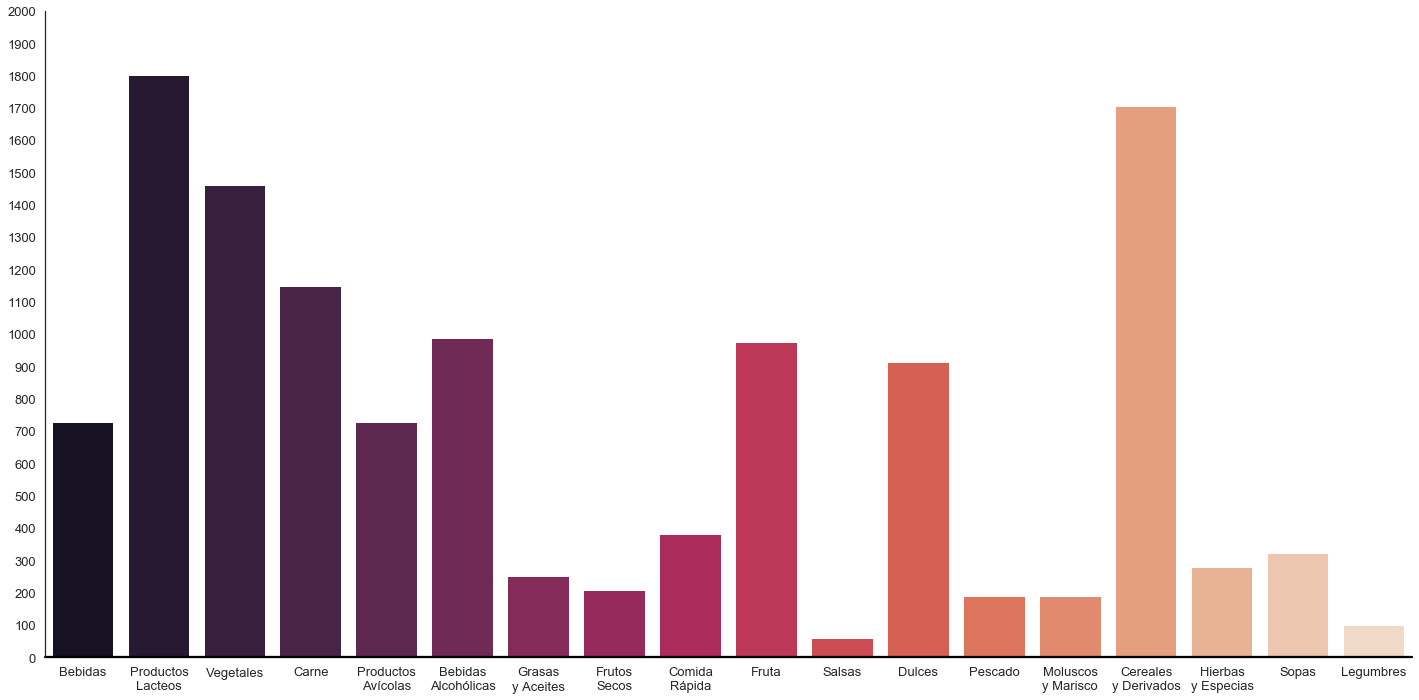

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1) = plt.subplots(1, 1, figsize=(20, 10), sharex=True)

# Generate some sequential data
x = englishCatUnique
y1 = countCatDef
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)


# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000])
plt.tight_layout(h_pad=2)
plt.savefig("cagoento.png") 